In [56]:
import duckdb
import polars as pl
import pandas as pd
import seaborn as sns

In [2]:
conn = duckdb.connect(database='../database/database.db')

In [3]:
conn.execute(
    """
    create table if not exists movies_table as select * from '../results/movies100k.parquet'
    """
)

df_movies = conn.execute("SELECT * FROM movies_table").pl()
print(df_movies)

shape: (1_682, 24)
┌─────────┬────────────────┬──────────────┬────────────────┬───┬────────┬──────────┬─────┬─────────┐
│ movieId ┆ title          ┆ release_date ┆ video_release_ ┆ … ┆ Sci-Fi ┆ Thriller ┆ War ┆ Western │
│ ---     ┆ ---            ┆ ---          ┆ date           ┆   ┆ ---    ┆ ---      ┆ --- ┆ ---     │
│ i64     ┆ str            ┆ str          ┆ ---            ┆   ┆ i64    ┆ i64      ┆ i64 ┆ i64     │
│         ┆                ┆              ┆ f64            ┆   ┆        ┆          ┆     ┆         │
╞═════════╪════════════════╪══════════════╪════════════════╪═══╪════════╪══════════╪═════╪═════════╡
│ 1       ┆ Toy Story      ┆ 01-Jan-1995  ┆ null           ┆ … ┆ 0      ┆ 0        ┆ 0   ┆ 0       │
│         ┆ (1995)         ┆              ┆                ┆   ┆        ┆          ┆     ┆         │
│ 2       ┆ GoldenEye      ┆ 01-Jan-1995  ┆ null           ┆ … ┆ 0      ┆ 1        ┆ 0   ┆ 0       │
│         ┆ (1995)         ┆              ┆                ┆   ┆        

In [4]:
conn.execute(
    """
    create table if not exists genres_table as select * from '../results/genres100k.parquet'
    """
)

df_genres = conn.execute("SELECT * FROM genres_table").pl()
print(df_genres)

shape: (19, 2)
┌────────────┬─────────┐
│ genre      ┆ genreId │
│ ---        ┆ ---     │
│ str        ┆ i64     │
╞════════════╪═════════╡
│ unknown    ┆ 0       │
│ Action     ┆ 1       │
│ Adventure  ┆ 2       │
│ Animation  ┆ 3       │
│ Children's ┆ 4       │
│ …          ┆ …       │
│ Romance    ┆ 14      │
│ Sci-Fi     ┆ 15      │
│ Thriller   ┆ 16      │
│ War        ┆ 17      │
│ Western    ┆ 18      │
└────────────┴─────────┘


In [5]:
conn.execute(
    """
    create table if not exists occupations_table as select * from '../results/occupations100k.parquet'
    """
)

df_occupations = conn.execute("SELECT * FROM occupations_table").pl()
print(df_occupations)

shape: (21, 1)
┌───────────────┐
│ occupation    │
│ ---           │
│ str           │
╞═══════════════╡
│ administrator │
│ artist        │
│ doctor        │
│ educator      │
│ engineer      │
│ …             │
│ salesman      │
│ scientist     │
│ student       │
│ technician    │
│ writer        │
└───────────────┘


In [6]:
conn.execute(
    """
    create table if not exists ratings_table as select * from '../results/ratings100k.parquet'
    """
)

df_ratings = conn.execute("SELECT * FROM ratings_table").pl()
print(df_ratings)

shape: (100_000, 4)
┌────────┬─────────┬────────┬───────────┐
│ userId ┆ movieId ┆ rating ┆ timestamp │
│ ---    ┆ ---     ┆ ---    ┆ ---       │
│ i64    ┆ i64     ┆ i64    ┆ i64       │
╞════════╪═════════╪════════╪═══════════╡
│ 196    ┆ 242     ┆ 3      ┆ 881250949 │
│ 186    ┆ 302     ┆ 3      ┆ 891717742 │
│ 22     ┆ 377     ┆ 1      ┆ 878887116 │
│ 244    ┆ 51      ┆ 2      ┆ 880606923 │
│ 166    ┆ 346     ┆ 1      ┆ 886397596 │
│ …      ┆ …       ┆ …      ┆ …         │
│ 880    ┆ 476     ┆ 3      ┆ 880175444 │
│ 716    ┆ 204     ┆ 5      ┆ 879795543 │
│ 276    ┆ 1090    ┆ 1      ┆ 874795795 │
│ 13     ┆ 225     ┆ 2      ┆ 882399156 │
│ 12     ┆ 203     ┆ 3      ┆ 879959583 │
└────────┴─────────┴────────┴───────────┘


In [7]:
conn.execute(
    """
    create table if not exists users_table as select * from '../results/users100k.parquet'
    """
)

df_users = conn.execute("SELECT * FROM users_table").pl()
print(df_users)

shape: (943, 5)
┌────────┬─────┬────────┬───────────────┬──────────┐
│ userId ┆ age ┆ gender ┆ occupation    ┆ zip_code │
│ ---    ┆ --- ┆ ---    ┆ ---           ┆ ---      │
│ i64    ┆ i64 ┆ str    ┆ str           ┆ str      │
╞════════╪═════╪════════╪═══════════════╪══════════╡
│ 1      ┆ 24  ┆ M      ┆ technician    ┆ 85711    │
│ 2      ┆ 53  ┆ F      ┆ other         ┆ 94043    │
│ 3      ┆ 23  ┆ M      ┆ writer        ┆ 32067    │
│ 4      ┆ 24  ┆ M      ┆ technician    ┆ 43537    │
│ 5      ┆ 33  ┆ F      ┆ other         ┆ 15213    │
│ …      ┆ …   ┆ …      ┆ …             ┆ …        │
│ 939    ┆ 26  ┆ F      ┆ student       ┆ 33319    │
│ 940    ┆ 32  ┆ M      ┆ administrator ┆ 02215    │
│ 941    ┆ 20  ┆ M      ┆ student       ┆ 97229    │
│ 942    ┆ 48  ┆ F      ┆ librarian     ┆ 78209    │
│ 943    ┆ 22  ┆ M      ┆ student       ┆ 77841    │
└────────┴─────┴────────┴───────────────┴──────────┘


In [8]:
# Ver todas as tabelas registadas no DuckDB
tables = conn.execute("SHOW TABLES").pl()
print("Tabelas disponíveis:")
print(tables)

Tabelas disponíveis:
shape: (7, 1)
┌───────────────────┐
│ name              │
│ ---               │
│ str               │
╞═══════════════════╡
│ genres_table      │
│ links_table       │
│ movies_table      │
│ occupations_table │
│ ratings_table     │
│ tags_table        │
│ users_table       │
└───────────────────┘


# Questions

### Movie & Genre Analysis 

#### 1. Which genres have the highest and lowest average ratings, and what might explain those differences? 

##### 1.1. Auxiliar 

In [9]:
df_movies.columns

['movieId',
 'title',
 'release_date',
 'video_release_date',
 'IMDb_URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [10]:
df_ratings_movies = duckdb.query(
    """ SELECT dfr.userID, dfr.movieId, dfr.rating, dfm.Action, dfm.Adventure, dfm.Animation, dfm."Children's", dfm.Comedy ,dfm.Crime, dfm.Documentary, dfm.Drama, dfm.Fantasy , dfm."Film-Noir" , dfm.Horror, dfm.Musical, dfm.Mystery, dfm.Romance, dfm."Sci-Fi", dfm.Thriller, dfm.War, dfm.Western 
    FROM df_ratings AS dfr
    INNER JOIN df_movies AS dfm ON dfr.movieId = dfm.movieId"""
).pl()
df_ratings_movies


userId,movieId,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
593,1,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
889,2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
880,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
870,4,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
880,5,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
274,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
8,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0


In [11]:
df_number_ratings = duckdb.query(
    """ SELECT dfrm.movieId,COUNT(dfrm.movieId) AS Number_Of_Ratings
    FROM df_ratings_movies AS dfrm
    GROUP BY dfrm.movieId
"""
).pl()
df_number_ratings

movieId,Number_Of_Ratings
i64,i64
5,86
9,299
14,183
17,92
30,37
…,…
1634,1
1636,1
1644,2


In [12]:
df_ratings_join_number_ratings = duckdb.query(
    """ SELECT *
    FROM df_ratings_movies AS dfrm
    INNER JOIN df_number_ratings AS dfnr ON dfrm.movieId == dfnr.movieId
"""
).pl()
df_ratings_join_number_ratings

userId,movieId,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movieId_1,Number_Of_Ratings
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
593,1,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,452
889,2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,131
880,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,90
870,4,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,4,209
880,5,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,5,86
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
274,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,50,583
8,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,50,583
2,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,50,583


In [13]:
df_ratings_join_number_ratings = df_ratings_join_number_ratings.drop('movieId_1')
df_ratings_join_number_ratings

userId,movieId,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number_Of_Ratings
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
593,1,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,452
889,2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,131
880,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,90
870,4,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,209
880,5,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,86
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
274,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,583
8,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,583
2,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,583


In [14]:
df_ratings_movies_agg_action = duckdb.query(
    """ SELECT 'Action' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm.Action = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm.Action
"""
).pl()

In [15]:
df_ratings_movies_agg_adventure = duckdb.query(
    """ SELECT 'Adventure' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm.Adventure = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm.Adventure
"""
).pl()

In [16]:
df_ratings_movies_agg_animation = duckdb.query(
    """ SELECT 'Animation' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_movies AS dfrm
    WHERE dfrm.Animation = 1
    GROUP BY dfrm.Animation
"""
).pl()

In [17]:
df_ratings_movies_agg_children = duckdb.query(
    """ SELECT 'Childrens' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm."Children's" = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm."Children's"
"""
).pl()

In [18]:
df_ratings_movies_agg_comedy = duckdb.query(
    """ SELECT 'Comedy' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm.Comedy = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm.Comedy
"""
).pl()

In [19]:
df_ratings_movies_agg_crime = duckdb.query(
    """ SELECT 'Crime' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm.Crime = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm.Crime
"""
).pl()

In [20]:
df_ratings_movies_agg_documentary = duckdb.query(
    """ SELECT 'Documentary' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm.Documentary = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm.Documentary
"""
).pl()

In [21]:
df_ratings_movies_agg_drama = duckdb.query(
    """ SELECT 'Drama' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm.Drama = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm.Drama
"""
).pl()

In [22]:
df_ratings_movies_agg_fantasy = duckdb.query(
    """ SELECT 'Fantasy' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm.Fantasy = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm.Fantasy
"""
).pl()

In [23]:
df_ratings_movies_agg_filmnoir = duckdb.query(
    """ SELECT 'Film-Noir' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm."Film-Noir" = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm."Film-Noir"
"""
).pl()

In [24]:
df_ratings_movies_agg_horror = duckdb.query(
    """ SELECT 'Horror' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_movies AS dfrm
    WHERE dfrm.Horror = 1
    GROUP BY dfrm.Horror
"""
).pl()

In [25]:
df_ratings_movies_agg_musical = duckdb.query(
    """ SELECT 'Musical' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm.musical = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm.musical
"""
).pl()

In [26]:
df_ratings_movies_agg_mystery = duckdb.query(
    """ SELECT 'Mystery' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm.Mystery = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm.Mystery
"""
).pl()

In [27]:
df_ratings_movies_agg_romance = duckdb.query(
    """ SELECT 'Romance' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm.Romance= 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm.Romance
"""
).pl()

In [28]:
df_ratings_movies_agg_scifi = duckdb.query(
    """ SELECT 'Sci-Fi' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm."Sci-Fi" = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm."Sci-Fi"
"""
).pl()

In [29]:
df_ratings_movies_agg_thriller = duckdb.query(
    """ SELECT 'Thriller' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm.Thriller = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm.Thriller
"""
).pl()

In [30]:
df_ratings_movies_agg_war = duckdb.query(
    """ SELECT 'War' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings  AS dfrm
    WHERE dfrm.War = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm.War
"""
).pl()

In [31]:
df_ratings_movies_agg_western = duckdb.query(
    """ SELECT 'Western' As Genre, AVG(dfrm.rating) AS Average_Rating
    FROM df_ratings_join_number_ratings AS dfrm
    WHERE dfrm.Western = 1 AND dfrm.Number_of_Ratings > 150
    GROUP BY dfrm.Western
"""
).pl()

##### 1.2 Answer 

In [32]:
df_genres_ratings = duckdb.query(
    """
    SELECT * FROM df_ratings_movies_agg_action
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_adventure
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_animation
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_children
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_comedy
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_crime
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_drama
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_fantasy
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_filmnoir
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_horror
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_musical
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_mystery
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_romance
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_scifi
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_thriller
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_war
    UNION ALL
    SELECT * FROM df_ratings_movies_agg_western
"""
).pl()
df_genres_ratings

Genre,Average_Rating
str,f64
"""Action""",3.709194
"""Adventure""",3.762768
"""Animation""",3.576699
"""Childrens""",3.759582
"""Comedy""",3.638537
…,…
"""Romance""",3.769182
"""Sci-Fi""",3.782534
"""Thriller""",3.689658


#### 2. Which genre combinations (e.g., Drama + Romance) are most frequent and best rated? 

In [33]:
df_ratings_join_number_ratings

userId,movieId,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number_Of_Ratings
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
593,1,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,452
889,2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,131
880,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,90
870,4,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,209
880,5,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,86
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
274,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,583
8,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,583
2,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,583


In [34]:
df_genres_combinations_freq = duckdb.query(
    """ SELECT dfm.Action, dfm.Adventure, dfm.Animation, dfm."Children's", dfm.Comedy ,dfm.Crime, dfm.Documentary, dfm.Drama, dfm.Fantasy , dfm."Film-Noir" , dfm.Horror, dfm.Musical, dfm.Mystery, dfm.Romance, dfm."Sci-Fi", dfm.Thriller, dfm.War, dfm.Western, COUNT(*) As Frequency
    FROM df_movies AS dfm
    GROUP BY dfm.Action, dfm.Adventure, dfm.Animation, dfm."Children's", dfm.Comedy ,dfm.Crime, dfm.Documentary, dfm.Drama, dfm.Fantasy , dfm."Film-Noir" , dfm.Horror, dfm.Musical, dfm.Mystery, dfm.Romance, dfm."Sci-Fi", dfm.Thriller, dfm.War, dfm.Western
    ORDER BY Frequency DESC"""
).pl()
df_genres_combinations_freq

Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Frequency
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,376
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,210
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,68
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,67
0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,65
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1
0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1


In [35]:
df_genres_combinations_rating = duckdb.query(
    """ SELECT dfm.Action, dfm.Adventure, dfm.Animation, dfm."Children's", dfm.Comedy ,dfm.Crime, dfm.Documentary, dfm.Drama, dfm.Fantasy , dfm."Film-Noir" , dfm.Horror, dfm.Musical, dfm.Mystery, dfm.Romance, dfm."Sci-Fi", dfm.Thriller, dfm.War, dfm.Western, AVG(dfm.rating) As Average_Rating
    FROM df_ratings_join_number_ratings AS dfm
    WHERE dfm.Number_Of_Ratings > 150
    GROUP BY dfm.Action, dfm.Adventure, dfm.Animation, dfm."Children's", dfm.Comedy ,dfm.Crime, dfm.Documentary, dfm.Drama, dfm.Fantasy , dfm."Film-Noir" , dfm.Horror, dfm.Musical, dfm.Mystery, dfm.Romance, dfm."Sci-Fi", dfm.Thriller, dfm.War, dfm.Western
    ORDER BY Average_Rating DESC"""
).pl()
df_genres_combinations_rating

Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Average_Rating
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,4.284916
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,4.252577
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,4.250804
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,4.245714
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.231214
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2.980695
0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,2.91411
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,2.847926


#### 3. Which movies are 'underrated' vs. 'overrated'? (Compare average rating vs. number of ratings.) 

In [36]:
df_ratings_join_number_ratings

userId,movieId,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number_Of_Ratings
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
593,1,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,452
889,2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,131
880,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,90
870,4,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,209
880,5,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,86
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
274,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,583
8,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,583
2,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,583


In [37]:
df_overrated_movies = duckdb.query(
    """
    SELECT 
        aux1.movieId, 
        dfm.title, 
        aux1.Number_Of_Ratings, 
        aux1.Rating_Average,
        (aux1.Rating_Average / LOG(aux1.Number_Of_Ratings + 1)) AS Overrated_Score
    FROM (
        SELECT 
            dfrnr.movieId,
            ANY_VALUE(dfrnr.Number_Of_Ratings) AS Number_Of_Ratings,
            AVG(dfrnr.rating) AS Rating_Average
        FROM df_ratings_join_number_ratings AS dfrnr
        GROUP BY dfrnr.movieId
    ) AS aux1
    INNER JOIN df_movies AS dfm 
        ON aux1.movieId = dfm.movieId
    WHERE aux1.Number_Of_Ratings > 50
    ORDER BY Overrated_Score DESC
    """
).pl()
df_overrated_movies

movieId,title,Number_Of_Ratings,Rating_Average,Overrated_Score
i64,str,i64,f64,f64
114,"""Wallace & Gromit: The Best of …",67,4.447761,2.427143
489,"""Notorious (1946)""",52,4.115385,2.386732
923,"""Raise the Red Lantern (1991)""",58,4.155172,2.346426
166,"""Manon of the Spring (Manon des…",58,4.12069,2.326953
513,"""Third Man, The (1949)""",72,4.333333,2.325594
…,…,…,…,…
988,"""Beautician and the Beast, The …",86,2.313953,1.193055
687,"""McHale's Navy (1997)""",69,2.188406,1.186065
294,"""Liar Liar (1997)""",485,3.156701,1.174964


In [38]:
df_underrated_movies = duckdb.query(
    """
    SELECT 
        aux1.movieId, 
        dfm.title, 
        aux1.Number_Of_Ratings, 
        aux1.Rating_Average,
        (aux1.Rating_Average / LOG(aux1.Number_Of_Ratings + 1)) AS Overrated_Score
    FROM (
        SELECT 
            dfrnr.movieId,
            ANY_VALUE(dfrnr.Number_Of_Ratings) AS Number_Of_Ratings,
            AVG(dfrnr.rating) AS Rating_Average
        FROM df_ratings_join_number_ratings AS dfrnr
        GROUP BY dfrnr.movieId
    ) AS aux1
    INNER JOIN df_movies AS dfm 
        ON aux1.movieId = dfm.movieId
    WHERE aux1.Number_Of_Ratings > 50
    ORDER BY Overrated_Score ASC
    """
).pl()
df_overrated_movies
df_underrated_movies

movieId,title,Number_Of_Ratings,Rating_Average,Overrated_Score
i64,str,i64,f64,f64
243,"""Jungle2Jungle (1997)""",132,2.439394,1.148571
122,"""Cable Guy, The (1996)""",106,2.339623,1.152873
294,"""Liar Liar (1997)""",485,3.156701,1.174964
687,"""McHale's Navy (1997)""",69,2.188406,1.186065
988,"""Beautician and the Beast, The …",86,2.313953,1.193055
…,…,…,…,…
513,"""Third Man, The (1949)""",72,4.333333,2.325594
166,"""Manon of the Spring (Manon des…",58,4.12069,2.326953
923,"""Raise the Red Lantern (1991)""",58,4.155172,2.346426


#### 4. Does genre diversity (single-genre vs. multi-genre) influence popularity or rating consistency? 

##### 4.1 Auxiliar

In [39]:
df_ratings_join_number_ratings

userId,movieId,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number_Of_Ratings
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
593,1,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,452
889,2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,131
880,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,90
870,4,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,209
880,5,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,86
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
274,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,583
8,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,583
2,50,5,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,583


In [40]:
df_average_rat_movie = duckdb.query("""
    SELECT 
        dfrjn.movieId,
        ANY_VALUE(dfrjn.Action) AS Action,
        ANY_VALUE(dfrjn.Adventure) AS Adventure,
        ANY_VALUE(dfrjn.Animation) AS Animation,
        ANY_VALUE(dfrjn."Children's") AS "Children's",
        ANY_VALUE(dfrjn.Comedy) AS Comedy,
        ANY_VALUE(dfrjn.Crime) AS Crime,
        ANY_VALUE(dfrjn.Documentary) AS Documentary,
        ANY_VALUE(dfrjn.Drama) AS Drama,
        ANY_VALUE(dfrjn.Fantasy) AS Fantasy,
        ANY_VALUE(dfrjn."Film-Noir") AS "Film-Noir",
        ANY_VALUE(dfrjn.Horror) AS Horror,
        ANY_VALUE(dfrjn.Musical) AS Musical,
        ANY_VALUE(dfrjn.Mystery) AS Mystery,
        ANY_VALUE(dfrjn.Romance) AS Romance,
        ANY_VALUE(dfrjn."Sci-Fi") AS "Sci-Fi",
        ANY_VALUE(dfrjn.Thriller) AS Thriller,
        ANY_VALUE(dfrjn.War) AS War,
        ANY_VALUE(dfrjn.Western) AS Western,
        AVG(dfrjn.rating) AS avg_rating
    FROM df_ratings_join_number_ratings AS dfrjn
    GROUP BY dfrjn.movieId
""").pl()
df_average_rat_movie

movieId,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rating
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64
15,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.778157
22,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,4.151515
31,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,3.62987
32,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.790123
52,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.769231
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1610,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2.0
1614,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.0
1647,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,3.0


In [41]:
test = list(df_average_rat_movie.filter(df_average_rat_movie["movieId"] == 50).select([
    "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary",
    "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance",
    "Sci-Fi", "Thriller", "War", "Western"]))
sum = 0
for i in test:
    sum += i
print(sum)
    
sum[0]

shape: (1,)
Series: 'Action' [i64]
[
	5
]


5

In [42]:
single_genre = []
multiple_genre = []
sum = 0
for id in df_average_rat_movie['movieId']:
    genres = list(df_average_rat_movie.filter(df_average_rat_movie["movieId"] == id).select([ 
    "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary",
    "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance",
    "Sci-Fi", "Thriller", "War", "Western"]))
    for genre in genres:
        sum += genre
    if sum[0] == 1:
        single_genre.append(list(df_average_rat_movie.filter(df_average_rat_movie["movieId"] == id).select("avg_rating"))[0])
    else:
        multiple_genre.append(list(df_average_rat_movie.filter(df_average_rat_movie["movieId"] == id).select("avg_rating"))[0])
    sum = 0

##### 4.2 Answer 

In [43]:
del sum
flat_single = [x[0] if isinstance(x, list) else x for x in single_genre]
flat_multiple = [x[0] if isinstance(x, list) else x for x in multiple_genre]

df_single_multiple_genre = pl.DataFrame({
    "Single_Genre_Avg_Rating": sum(flat_single) / len(flat_single),
    "Multiple_Genre_Avg_Rating": sum(flat_multiple) / len(flat_multiple)
})
df_single_multiple_genre 

Single_Genre_Avg_Rating,Multiple_Genre_Avg_Rating
f64,f64
2.985598,3.164365


#### 6. How do a movie’s genre, number of ratings, and average rating interact — are some genres more likely to be popular but lower-rated, or niche but highly-rated?

In [44]:
"""
import duckdb
import polars as pl

conn = duckdb.connect()
conn.register("ratings", df_ratings)
conn.register("movies", df_movies)
"""

genre_cols = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Unpivot genres with proper escaping
unpivot_sql = " UNION ALL ".join([
    f"""
    SELECT
        '{g.replace("'", "''")}' AS genre,
        r.rating
    FROM ratings_table r
    JOIN movies_table m ON r.movieId = m.movieId
    WHERE m."{g}" = 1
    """ for g in genre_cols
])

sql = f"""
SELECT
    genre,
    COUNT(rating) AS num_ratings,
    AVG(rating) AS avg_rating
FROM (
    {unpivot_sql}
) t
GROUP BY genre
ORDER BY num_ratings DESC
"""

df_genre_stats = conn.execute(sql).pl()
print(df_genre_stats)


shape: (18, 3)
┌─────────────┬─────────────┬────────────┐
│ genre       ┆ num_ratings ┆ avg_rating │
│ ---         ┆ ---         ┆ ---        │
│ str         ┆ i64         ┆ f64        │
╞═════════════╪═════════════╪════════════╡
│ Drama       ┆ 39895       ┆ 3.687379   │
│ Comedy      ┆ 29832       ┆ 3.394073   │
│ Action      ┆ 25589       ┆ 3.480245   │
│ Thriller    ┆ 21872       ┆ 3.509007   │
│ Romance     ┆ 19461       ┆ 3.621705   │
│ …           ┆ …           ┆ …          │
│ Animation   ┆ 3605        ┆ 3.576699   │
│ Western     ┆ 1854        ┆ 3.613269   │
│ Film-Noir   ┆ 1733        ┆ 3.921523   │
│ Fantasy     ┆ 1352        ┆ 3.215237   │
│ Documentary ┆ 758         ┆ 3.672823   │
└─────────────┴─────────────┴────────────┘


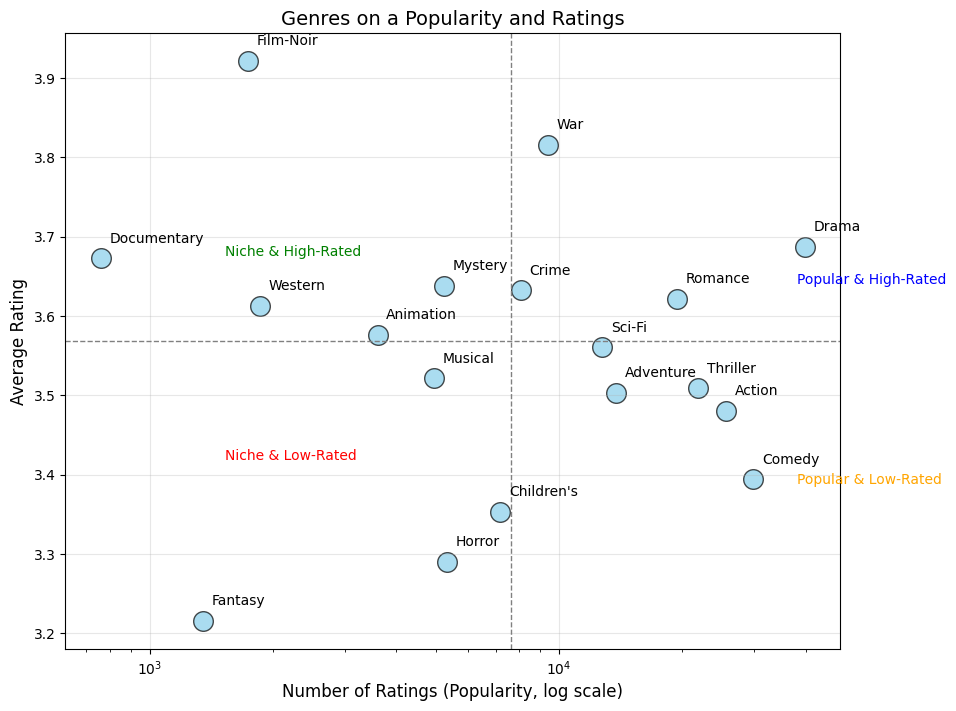

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Extract axes
x = df_genre_stats["num_ratings"].to_numpy()
y = df_genre_stats["avg_rating"].to_numpy()
labels = df_genre_stats["genre"].to_list()

# Create figure
plt.figure(figsize=(10,8))

# Scatter points
plt.scatter(x, y, s=200, alpha=0.7, color='skyblue', edgecolor='black')

# Log scale for popularity
plt.xscale('log')

# Draw vertical and horizontal lines for “center” (median values)
median_x = np.median(x)
median_y = np.median(y)
plt.axvline(median_x, color='gray', linestyle='--', lw=1)
plt.axhline(median_y, color='gray', linestyle='--', lw=1)

# Add labels
for i, label in enumerate(labels):
    plt.text(x[i]*1.05, y[i]+0.02, label, fontsize=10)

# Titles and labels
plt.xlabel("Number of Ratings (Popularity, log scale)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Genres on a Popularity and Ratings", fontsize=14)

# Add quadrant labels
plt.text(median_x/5, median_y*1.03, 'Niche & High-Rated', fontsize=10, color='green')
plt.text(median_x*5, median_y*1.02, 'Popular & High-Rated', fontsize=10, color='blue')
plt.text(median_x/5, median_y-0.15, 'Niche & Low-Rated', fontsize=10, color='red')
plt.text(median_x*5, median_y-0.18, 'Popular & Low-Rated', fontsize=10, color='orange')

plt.grid(True, alpha=0.3)
plt.show()


#### 6. Do certain occupations prefer specific genres?

In [51]:
# Fix column names in movies
df_movies_clean = df_movies.rename({
    "Children's": "Childrens"  # rename to remove single quote
})

# Register DataFrames
# duckdb_conn = duckdb.connect()
# duckdb_conn.register("ratings", df_ratings)
# duckdb_conn.register("users", df_users)
conn.register("movies", df_movies_clean)

# Updated genre columns to match renamed column
genre_cols = ['Action', 'Adventure', 'Animation', "Childrens", 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Build SQL UNION ALL to unpivot genres
unpivot_sql = " UNION ALL ".join([
    f"""
    SELECT u.occupation, r.rating, '{g}' AS genre
    FROM ratings_table r
    JOIN users_table u ON r.userId = u.userId
    JOIN movies m ON r.movieId = m.movieId
    WHERE m."{g}" = 1
    """
    for g in genre_cols
])

sql = f"""
SELECT occupation, genre, AVG(rating) AS avg_rating, COUNT(*) AS num_ratings
FROM (
    {unpivot_sql}
) t
GROUP BY occupation, genre
ORDER BY occupation, avg_rating DESC
"""

df_result = conn.execute(sql).pl()
print(df_result)

shape: (377, 4)
┌───────────────┬─────────────┬────────────┬─────────────┐
│ occupation    ┆ genre       ┆ avg_rating ┆ num_ratings │
│ ---           ┆ ---         ┆ ---        ┆ ---         │
│ str           ┆ str         ┆ f64        ┆ i64         │
╞═══════════════╪═════════════╪════════════╪═════════════╡
│ administrator ┆ Film-Noir   ┆ 3.972789   ┆ 147         │
│ administrator ┆ War         ┆ 3.924936   ┆ 786         │
│ administrator ┆ Documentary ┆ 3.875      ┆ 48          │
│ administrator ┆ Drama       ┆ 3.796063   ┆ 3099        │
│ administrator ┆ Mystery     ┆ 3.763636   ┆ 385         │
│ …             ┆ …           ┆ …          ┆ …           │
│ writer        ┆ Adventure   ┆ 3.302671   ┆ 674         │
│ writer        ┆ Action      ┆ 3.285604   ┆ 1292        │
│ writer        ┆ Comedy      ┆ 3.268742   ┆ 1574        │
│ writer        ┆ Fantasy     ┆ 3.197183   ┆ 71          │
│ writer        ┆ Horror      ┆ 3.10793    ┆ 454         │
└───────────────┴─────────────┴─────────

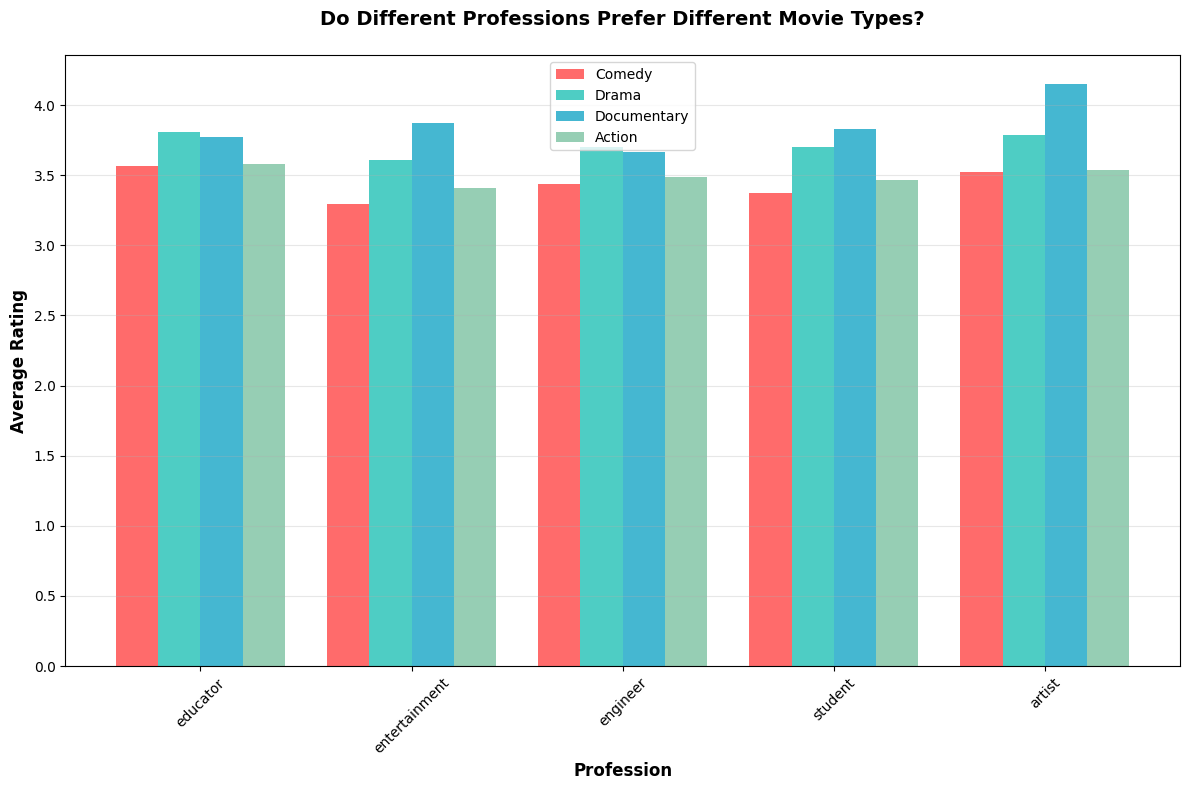

In [52]:
# Select interesting professions and genres for comparison
selected_occupations = ['educator', 'entertainment', 'engineer', 'student', 'artist']
selected_genres = ['Comedy', 'Drama', 'Documentary', 'Action']

# Filter data
filtered_data = df_result.filter(
    pl.col('occupation').is_in(selected_occupations) & 
    pl.col('genre').is_in(selected_genres)
)

# Convert to pandas for easier plotting with matplotlib/seaborn
plot_data = filtered_data.to_pandas()

# Create the visualization
plt.figure(figsize=(12, 8))

# Create grouped bar chart
x_pos = np.arange(len(selected_occupations))
bar_width = 0.2
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, genre in enumerate(selected_genres):
    genre_data = plot_data[plot_data['genre'] == genre]
    ratings = [genre_data[genre_data['occupation'] == occ]['avg_rating'].values[0] 
               if not genre_data[genre_data['occupation'] == occ].empty else 0 
               for occ in selected_occupations]
    
    plt.bar(x_pos + i * bar_width, ratings, bar_width, 
             label=genre, color=colors[i % len(colors)])

plt.xlabel('Profession', fontsize=12, fontweight='bold')
plt.ylabel('Average Rating', fontsize=12, fontweight='bold')
plt.title('Do Different Professions Prefer Different Movie Types?\n', 
          fontsize=14, fontweight='bold')
plt.xticks(x_pos + bar_width * 1.5, selected_occupations, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

TypeError: suptitle() missing 1 required positional argument: 't'

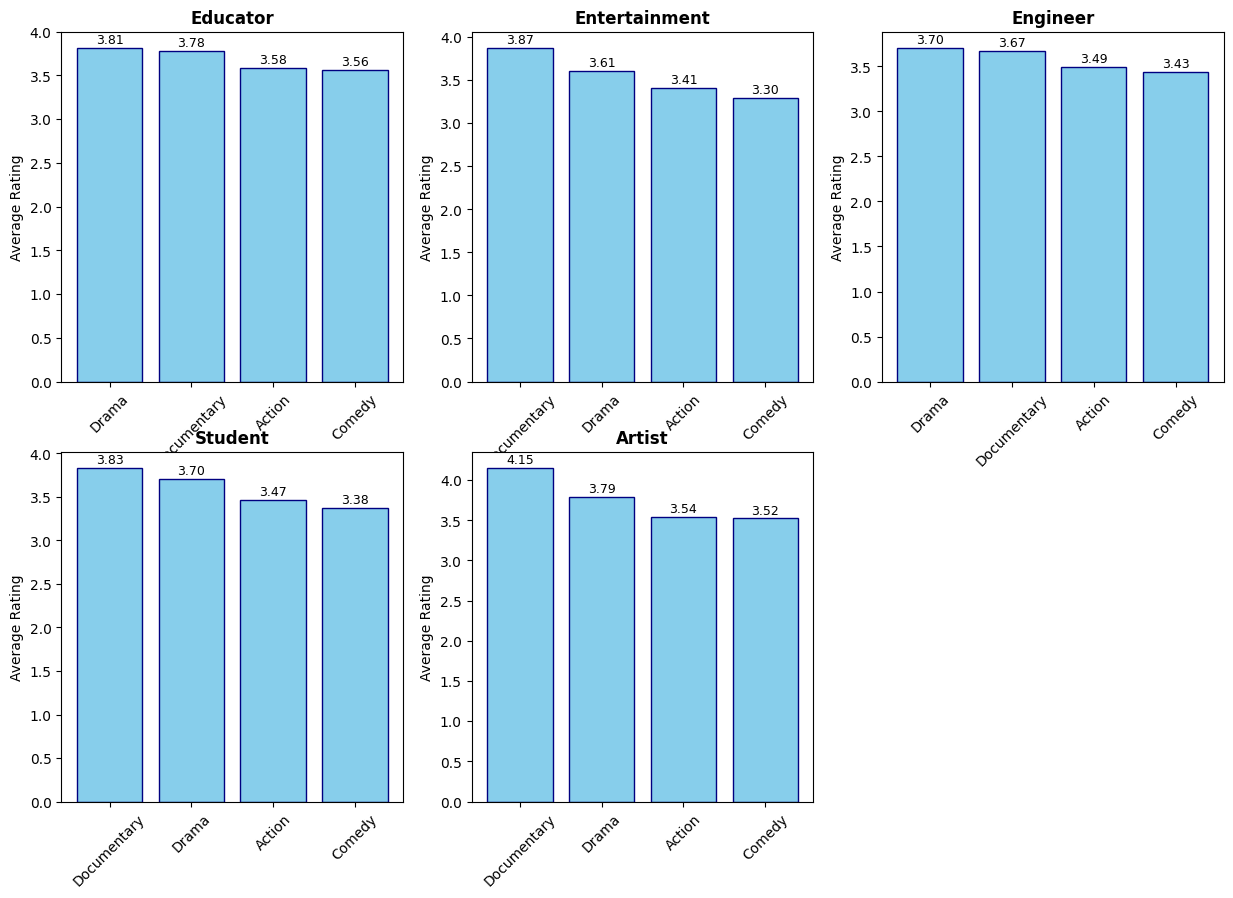

In [53]:
# Create subplots for each profession
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, occupation in enumerate(selected_occupations):
    if i < len(axes):
        occ_data = plot_data[plot_data['occupation'] == occupation]
        
        # Sort by rating for better visualization
        occ_data = occ_data.sort_values('avg_rating', ascending=False)
        
        bars = axes[i].bar(occ_data['genre'], occ_data['avg_rating'], 
                          color='skyblue', edgecolor='navy')
        
        axes[i].set_title(f'{occupation.title()}', fontweight='bold')
        axes[i].set_ylabel('Average Rating')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                        f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# Remove empty subplot if needed
if len(selected_occupations) < len(axes):
    for i in range(len(selected_occupations), len(axes)):
        fig.delaxes(axes[i])

plt.suptitle( 
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

In [54]:
# Calculate some interesting insights for your presentation
print("🔍 KEY INSIGHTS FOR YOUR PRESENTATION:")
print("="*50)

# 1. Find which profession is the toughest critic
toughest = (df_result.group_by('occupation')
            .agg(pl.col('avg_rating').mean().alias('overall_avg'))
            .sort('overall_avg')
            .head(1))

print(f"1. Toughest Critics: {toughest['occupation'][0]} (avg: {toughest['overall_avg'][0]:.2f})")

# 2. Find which profession is most generous
most_generous = (df_result.group_by('occupation')
                 .agg(pl.col('avg_rating').mean().alias('overall_avg'))
                 .sort('overall_avg', descending=True)
                 .head(1))

print(f"2. Most Generous: {most_generous['occupation'][0]} (avg: {most_generous['overall_avg'][0]:.2f})")

# 3. Most loved genre overall
most_loved = (df_result.group_by('genre')
               .agg(pl.col('avg_rating').mean().alias('genre_avg'))
               .sort('genre_avg', descending=True)
               .head(1))

print(f"3. Most Loved Genre: {most_loved['genre'][0]} (avg: {most_loved['genre_avg'][0]:.2f})")

# 4. Biggest genre preference differences
genre_std = (df_result.group_by('genre')
              .agg(pl.col('avg_rating').std().alias('rating_std'))
              .sort('rating_std', descending=True)
              .head(3))

print("4. Most Controversial Genres (biggest opinion differences):")
for genre in genre_std.iter_rows():
    print(f"   - {genre[0]}: {genre[1]:.3f} std")

🔍 KEY INSIGHTS FOR YOUR PRESENTATION:
1. Toughest Critics: healthcare (avg: 2.94)
2. Most Generous: lawyer (avg: 3.77)
3. Most Loved Genre: Film-Noir (avg: 3.89)
4. Most Controversial Genres (biggest opinion differences):
   - Documentary: 0.461 std
   - Fantasy: 0.399 std
   - Film-Noir: 0.314 std


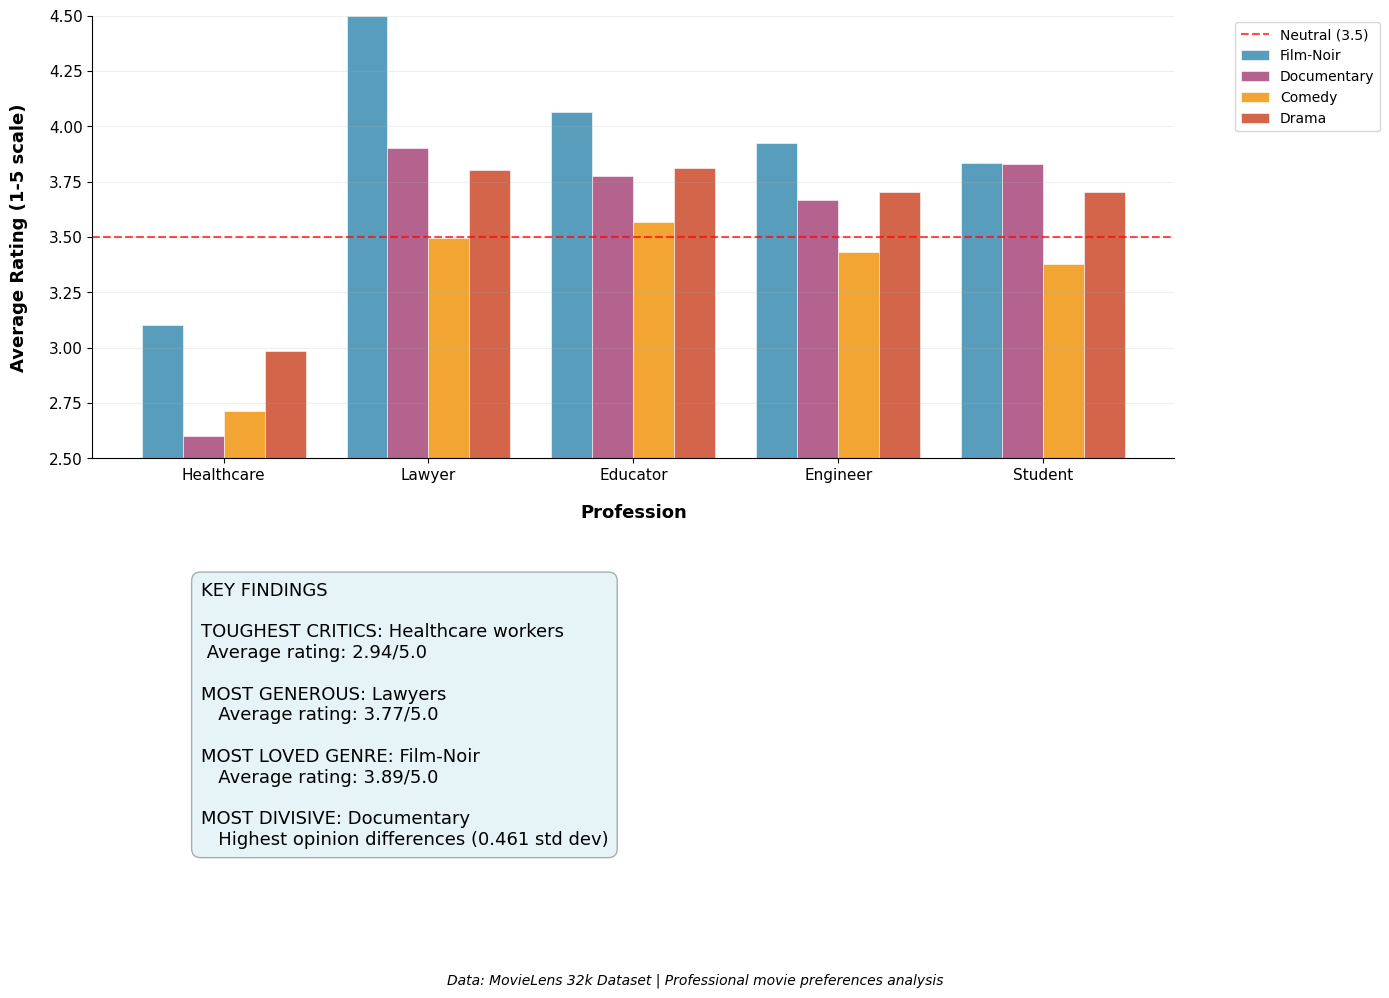

In [57]:
# Presentation-Ready Version with Your Actual Insights
plt.figure(figsize=(14, 10))

# Use your actual data
selected_occupations = ['healthcare', 'lawyer', 'educator', 'engineer', 'student']
selected_genres = ['Film-Noir', 'Documentary', 'Comedy', 'Drama']

# Filter data for these specific professions and genres
filtered_data = df_result.filter(
    pl.col('occupation').is_in(selected_occupations) & 
    pl.col('genre').is_in(selected_genres)
)

plot_data = filtered_data.to_pandas()

# Create the main visualization
plt.subplot(2, 1, 1)  # Top half for the main chart

# Professional color palette
professional_palette = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
x_pos = np.arange(len(selected_occupations))
bar_width = 0.2

for i, genre in enumerate(selected_genres):
    genre_data = plot_data[plot_data['genre'] == genre]
    ratings = [genre_data[genre_data['occupation'] == occ]['avg_rating'].values[0] 
               for occ in selected_occupations]
    
    bars = plt.bar(x_pos + i * bar_width, ratings, bar_width, 
                   label=genre, color=professional_palette[i],
                   alpha=0.8, edgecolor='white', linewidth=0.5)

# Styling
plt.xlabel('Profession', fontsize=13, fontweight='bold', labelpad=15)
plt.ylabel('Average Rating (1-5 scale)', fontsize=13, fontweight='bold', labelpad=15)


plt.xticks(x_pos + bar_width * 1.5, [occ.title() for occ in selected_occupations], 
           fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(2.5, 4.5)  # Adjusted to show the full range

# Add reference line
plt.axhline(y=3.5, color='red', linestyle='--', alpha=0.7, label='Neutral (3.5)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

# Clean background
sns.despine()
plt.grid(axis='y', alpha=0.2)

# Bottom half for key insights
plt.subplot(2, 1, 2)
plt.axis('off')

# Create insights boxes
insights_text = [
    "KEY FINDINGS",
    "",
    f"TOUGHEST CRITICS: Healthcare workers",
    f" Average rating: {toughest['overall_avg'][0]:.2f}/5.0",
    "",
    f"MOST GENEROUS: Lawyers", 
    f"   Average rating: {most_generous['overall_avg'][0]:.2f}/5.0",
    "",
    f"MOST LOVED GENRE: Film-Noir",
    f"   Average rating: {most_loved['genre_avg'][0]:.2f}/5.0",
    "",
    f"MOST DIVISIVE: Documentary",
    f"   Highest opinion differences ({genre_std['rating_std'][0]:.3f} std dev)"
]

# Add insights as text
plt.text(0.1, 0.9, '\n'.join(insights_text), 
         fontsize=13, 
         fontfamily='sans-serif',
         verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.3))

plt.figtext(0.5, 0.01, 
           "Data: MovieLens 32k Dataset | Professional movie preferences analysis", 
           ha="center", fontsize=10, style='italic')

plt.tight_layout()
plt.show()

C:\Users\carla\AppData\Local\Temp\ipykernel_22068\1158415345.py:83: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(occupation_data, labels=top_occupations['occupation'])


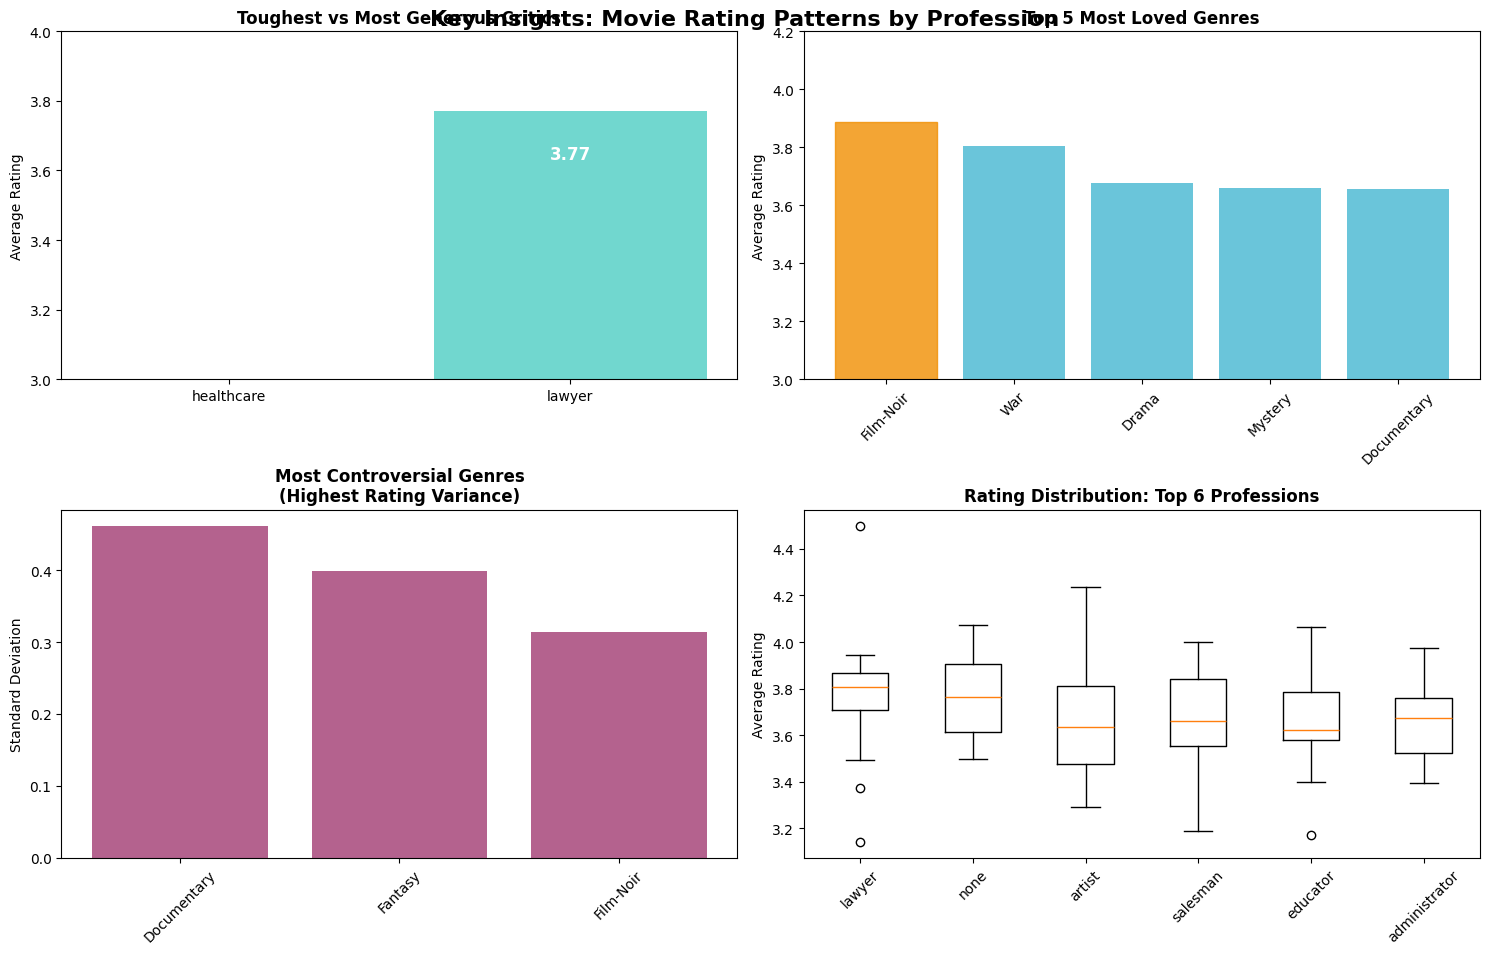

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import FancyBboxPatch

# Calculate all insights
toughest = (df_result.group_by('occupation')
            .agg(pl.col('avg_rating').mean().alias('overall_avg'))
            .sort('overall_avg')
            .head(1))

most_generous = (df_result.group_by('occupation')
                 .agg(pl.col('avg_rating').mean().alias('overall_avg'))
                 .sort('overall_avg', descending=True)
                 .head(1))

most_loved = (df_result.group_by('genre')
               .agg(pl.col('avg_rating').mean().alias('genre_avg'))
               .sort('genre_avg', descending=True)
               .head(1))

genre_std = (df_result.group_by('genre')
              .agg(pl.col('avg_rating').std().alias('rating_std'))
              .sort('rating_std', descending=True)
              .head(3))

# Create dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Key Insights: Movie Rating Patterns by Profession', 
             fontsize=16, fontweight='bold', y=0.95)

# 1. Toughest vs Most Generous Critics
occupations_compare = [toughest['occupation'][0], most_generous['occupation'][0]]
ratings_compare = [toughest['overall_avg'][0], most_generous['overall_avg'][0]]
colors_compare = ['#FF6B6B', '#4ECDC4']

bars = ax1.bar(occupations_compare, ratings_compare, color=colors_compare, alpha=0.8)
ax1.set_title('Toughest vs Most Generous Critics', fontweight='bold')
ax1.set_ylabel('Average Rating')
ax1.set_ylim(3.0, 4.0)

# Add value labels on bars
for bar, rating in zip(bars, ratings_compare):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height - 0.1,
             f'{rating:.2f}', ha='center', va='top', 
             color='white', fontweight='bold', fontsize=12)

# 2. Most Loved Genre
genres_top5 = (df_result.group_by('genre')
               .agg(pl.col('avg_rating').mean().alias('genre_avg'))
               .sort('genre_avg', descending=True)
               .head(5))

ax2.bar(genres_top5['genre'], genres_top5['genre_avg'], 
        color='#45B7D1', alpha=0.8)
ax2.set_title('Top 5 Most Loved Genres', fontweight='bold')
ax2.set_ylabel('Average Rating')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(3.0, 4.2)

# Highlight the top genre
ax2.patches[0].set_color('#F18F01')

# 3. Most Controversial Genres
ax3.bar(genre_std['genre'], genre_std['rating_std'], 
        color='#A23B72', alpha=0.8)
ax3.set_title('Most Controversial Genres\n(Highest Rating Variance)', fontweight='bold')
ax3.set_ylabel('Standard Deviation')
ax3.tick_params(axis='x', rotation=45)

# 4. Rating Distribution by Top 6 Professions
top_occupations = (df_result.group_by('occupation')
                   .agg(pl.col('avg_rating').mean().alias('overall_avg'))
                   .sort('overall_avg', descending=True)
                   .head(6))

occupation_data = []
for occ in top_occupations['occupation']:
    occ_ratings = df_result.filter(pl.col('occupation') == occ)['avg_rating']
    occupation_data.append(occ_ratings.to_list())

ax4.boxplot(occupation_data, labels=top_occupations['occupation'])
ax4.set_title('Rating Distribution: Top 6 Professions', fontweight='bold')
ax4.set_ylabel('Average Rating')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\carla\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


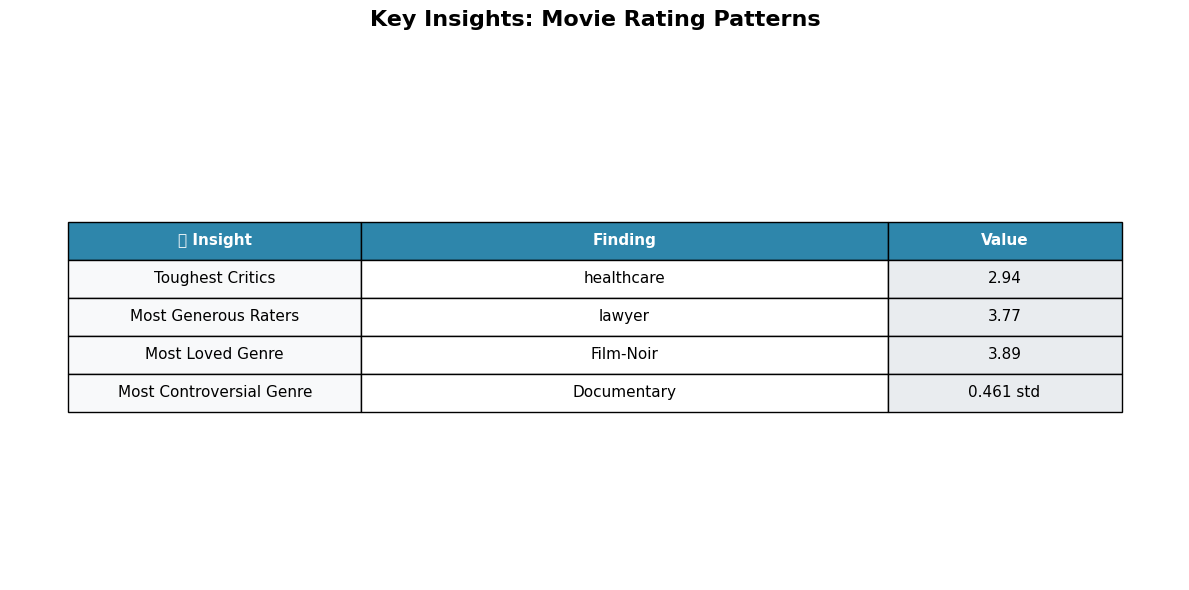

In [59]:
# Create a beautiful insights table
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

# Prepare table data
table_data = [
    ['🔍 Insight', 'Finding', 'Value'],
    ['Toughest Critics', toughest['occupation'][0], f"{toughest['overall_avg'][0]:.2f}"],
    ['Most Generous Raters', most_generous['occupation'][0], f"{most_generous['overall_avg'][0]:.2f}"],
    ['Most Loved Genre', most_loved['genre'][0], f"{most_loved['genre_avg'][0]:.2f}"],
    ['Most Controversial Genre', genre_std['genre'][0], f"{genre_std['rating_std'][0]:.3f} std"]
]

# Create table with colors
table = ax.table(cellText=table_data,
                cellLoc='center',
                loc='center',
                colWidths=[0.25, 0.45, 0.2])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2)

# Color header row
for i in range(3):
    table[(0, i)].set_facecolor('#2E86AB')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color data rows
for i in range(1, 5):
    table[(i, 0)].set_facecolor('#F8F9FA')
    table[(i, 1)].set_facecolor('#FFFFFF')
    table[(i, 2)].set_facecolor('#E9ECEF')

plt.title('Key Insights: Movie Rating Patterns', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

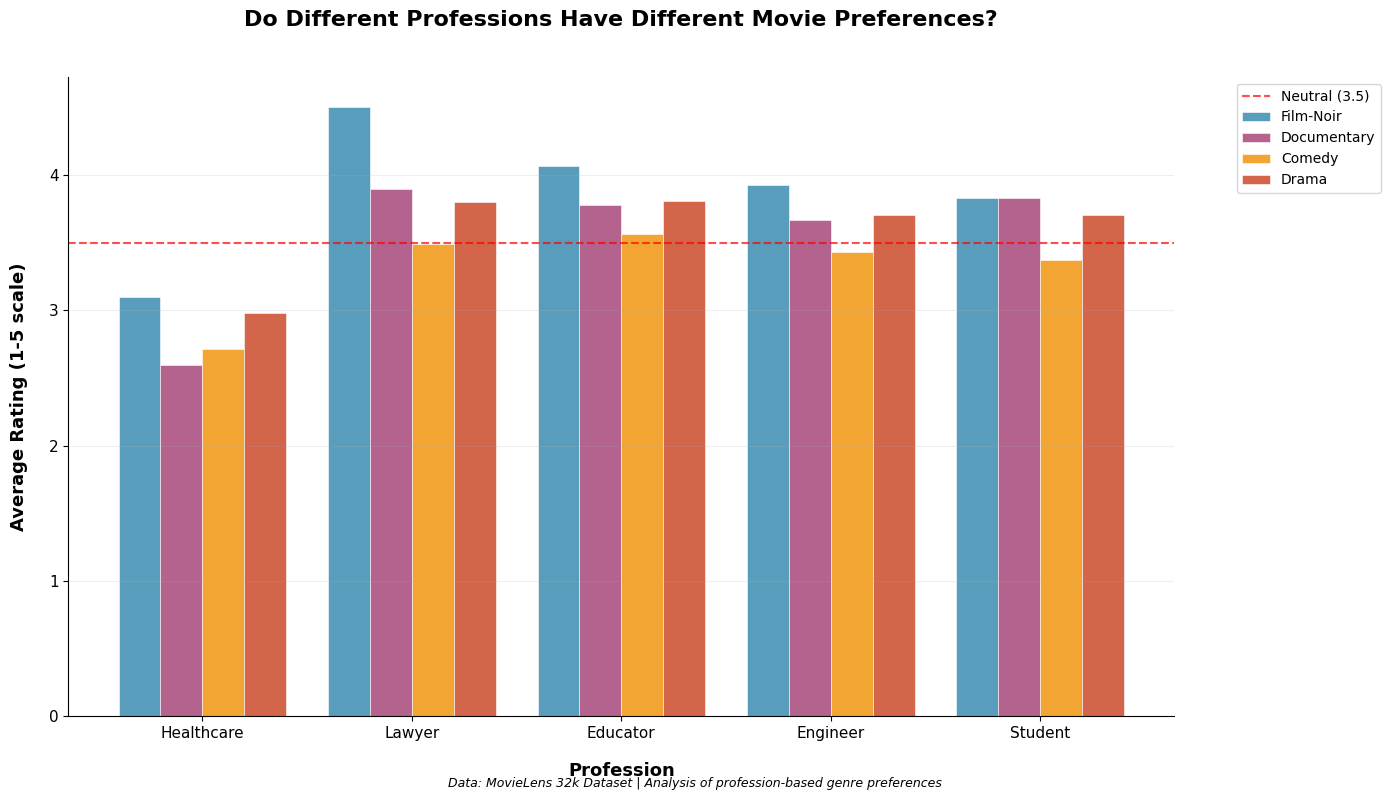

In [60]:
# Professional-looking version for your presentation
plt.figure(figsize=(14, 8))

# Use a professional color palette
professional_palette = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

# Prepare data
x_pos = np.arange(len(selected_occupations))
bar_width = 0.2

for i, genre in enumerate(selected_genres):
    genre_data = plot_data[plot_data['genre'] == genre]
    ratings = [genre_data[genre_data['occupation'] == occ]['avg_rating'].values[0] 
               for occ in selected_occupations]
    
    plt.bar(x_pos + i * bar_width, ratings, bar_width, 
             label=genre, color=professional_palette[i],
             alpha=0.8, edgecolor='white', linewidth=0.5)

# Styling for professional presentation
plt.xlabel('Profession', fontsize=13, fontweight='bold', labelpad=15)
plt.ylabel('Average Rating (1-5 scale)', fontsize=13, fontweight='bold', labelpad=15)
plt.title('Do Different Professions Have Different Movie Preferences?\n', 
          fontsize=16, fontweight='bold', pad=20)

plt.xticks(x_pos + bar_width * 1.5, [occ.title() for occ in selected_occupations], 
           fontsize=11)
plt.yticks(fontsize=11)

# Add some context
plt.axhline(y=3.5, color='red', linestyle='--', alpha=0.7, label='Neutral (3.5)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

# Clean background
sns.despine()
plt.grid(axis='y', alpha=0.2)

# Add data source
plt.figtext(0.5, 0.01, "Data: MovieLens 32k Dataset | Analysis of profession-based genre preferences", 
            ha="center", fontsize=9, style='italic')

plt.tight_layout()
plt.show()

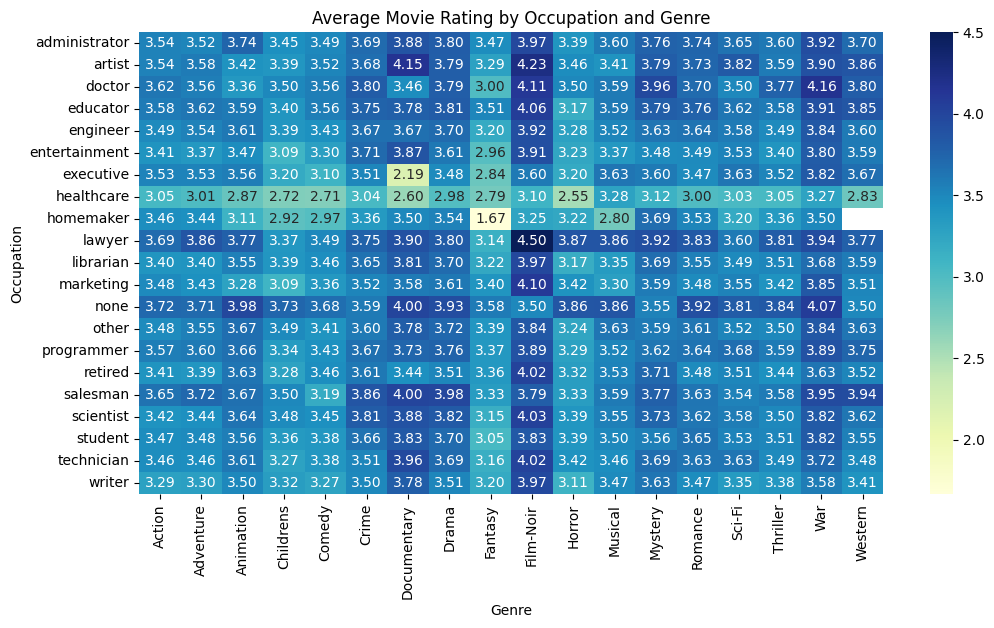

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

df_pivot = df_result.to_pandas().pivot(
    index="occupation",
    columns="genre",
    values="avg_rating"
)

plt.figure(figsize=(12,6))
sns.heatmap(df_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Movie Rating by Occupation and Genre")
plt.xlabel("Genre")
plt.ylabel("Occupation")
plt.show()

### User Behavior & Demographics 

#### 5. Do some users tend to rate more generously or more harshly than others? 

In [62]:
df_user_tendencies = conn.execute("""
WITH user_stats AS (
    SELECT 
        userId,
        AVG(rating) AS avg_user_rating,
        COUNT(*) AS n_ratings
    FROM ratings_table
    GROUP BY userId
),
global_stats AS (
    SELECT 
        AVG(rating) AS global_avg_rating
    FROM ratings_table
),
classified AS (
    SELECT
        u.userId,
        u.avg_user_rating,
        u.n_ratings,
        g.global_avg_rating,
        u.avg_user_rating - g.global_avg_rating AS diff_from_global,
        CASE
            WHEN u.avg_user_rating - g.global_avg_rating >= 0.5 THEN 'Generous'
            WHEN u.avg_user_rating - g.global_avg_rating <= -0.5 THEN 'Harsh'
            ELSE 'Neutral'
        END AS rating_tendency
    FROM user_stats u
    CROSS JOIN global_stats g
    WHERE u.n_ratings >= 20
)
SELECT *
FROM classified
ORDER BY diff_from_global DESC
LIMIT 50
""").pl()

print(df_user_tendencies)

shape: (50, 6)
┌────────┬─────────────────┬───────────┬───────────────────┬──────────────────┬─────────────────┐
│ userId ┆ avg_user_rating ┆ n_ratings ┆ global_avg_rating ┆ diff_from_global ┆ rating_tendency │
│ ---    ┆ ---             ┆ ---       ┆ ---               ┆ ---              ┆ ---             │
│ i64    ┆ f64             ┆ i64       ┆ f64               ┆ f64              ┆ str             │
╞════════╪═════════════════╪═══════════╪═══════════════════╪══════════════════╪═════════════════╡
│ 849    ┆ 4.869565        ┆ 23        ┆ 3.52986           ┆ 1.339705         ┆ Generous        │
│ 688    ┆ 4.833333        ┆ 24        ┆ 3.52986           ┆ 1.303473         ┆ Generous        │
│ 507    ┆ 4.724138        ┆ 58        ┆ 3.52986           ┆ 1.194278         ┆ Generous        │
│ 628    ┆ 4.703704        ┆ 27        ┆ 3.52986           ┆ 1.173844         ┆ Generous        │
│ 928    ┆ 4.6875          ┆ 32        ┆ 3.52986           ┆ 1.15764          ┆ Generous        │
│ …  

In [63]:
df_user_tendency_summary = conn.execute("""
WITH user_stats AS (
    SELECT 
        userId,
        AVG(rating) AS avg_user_rating,
        COUNT(*) AS n_ratings
    FROM ratings_table
    GROUP BY userId
),
global_stats AS (
    SELECT 
        AVG(rating) AS global_avg_rating
    FROM ratings_table
),
classified AS (
    SELECT
        u.userId,
        u.avg_user_rating,
        u.n_ratings,
        u.avg_user_rating - g.global_avg_rating AS diff_from_global,
        CASE
            WHEN u.avg_user_rating - g.global_avg_rating >= 0.5 THEN 'Generous'
            WHEN u.avg_user_rating - g.global_avg_rating <= -0.5 THEN 'Harsh'
            ELSE 'Neutral'
        END AS rating_tendency
    FROM user_stats u
    CROSS JOIN global_stats g
    WHERE u.n_ratings >= 20
)
SELECT 
    rating_tendency,
    COUNT(*) AS n_users,
    ROUND(AVG(avg_user_rating), 3) AS avg_rating_in_group,
    ROUND(AVG(diff_from_global), 3) AS avg_diff_from_global
FROM classified
GROUP BY rating_tendency
ORDER BY n_users DESC
""").pl()

print(df_user_tendency_summary)

shape: (3, 4)
┌─────────────────┬─────────┬─────────────────────┬──────────────────────┐
│ rating_tendency ┆ n_users ┆ avg_rating_in_group ┆ avg_diff_from_global │
│ ---             ┆ ---     ┆ ---                 ┆ ---                  │
│ str             ┆ i64     ┆ f64                 ┆ f64                  │
╞═════════════════╪═════════╪═════════════════════╪══════════════════════╡
│ Neutral         ┆ 704     ┆ 3.573               ┆ 0.043                │
│ Generous        ┆ 141     ┆ 4.242               ┆ 0.712                │
│ Harsh           ┆ 98      ┆ 2.758               ┆ -0.772               │
└─────────────────┴─────────┴─────────────────────┴──────────────────────┘


#### 6. How do age and gender influence movie preferences and rating generosity? 

##### 6.1 - Rating generosity by age and gender

In [64]:
conn.execute("SHOW TABLES").df()


,name
0,genres_table
1,links_table
2,movies
3,movies_table
4,occupations_table
5,ratings_table
6,tags_table
7,users_table


In [65]:
print(df_users.schema)
print(df_users.select("gender").unique())


Schema({'userId': Int64, 'age': Int64, 'gender': String, 'occupation': String, 'zip_code': String})
shape: (2, 1)
┌────────┐
│ gender │
│ ---    │
│ str    │
╞════════╡
│ F      │
│ M      │
└────────┘


In [66]:
df_users_temp = df_users.clone()

df_users_temp = df_users_temp.with_columns([
    pl.when(pl.col('gender') == '1')
      .then(pl.lit('M'))
      .otherwise(pl.lit('F'))
      .alias('gender')
])

conn.register('users_temp_table', df_users_temp)

df_age_gender_generosity = conn.execute("""
WITH user_avg AS (
    SELECT 
        r.userId,
        AVG(r.rating) AS avg_user_rating,
        COUNT(*) AS n_ratings
    FROM ratings_table r
    GROUP BY r.userId
),
user_demo AS (
    SELECT 
        ua.userId,
        ua.avg_user_rating,
        ua.n_ratings,
        u.age,
        u.gender AS gender_label   -- já é string
    FROM user_avg ua
    JOIN users_temp_table u
      ON ua.userId = u.userId
    WHERE ua.n_ratings >= 20
),
global_stats AS (
    SELECT AVG(rating) AS global_avg_rating
    FROM ratings_table
),
classified AS (
    SELECT
        gender_label,
        CASE 
            WHEN age < 18 THEN '<18'
            WHEN age BETWEEN 18 AND 24 THEN '18-24'
            WHEN age BETWEEN 25 AND 34 THEN '25-34'
            WHEN age BETWEEN 35 AND 44 THEN '35-44'
            WHEN age BETWEEN 45 AND 54 THEN '45-54'
            ELSE '55+'
        END AS age_group,
        avg_user_rating,
        n_ratings,
        avg_user_rating - g.global_avg_rating AS diff_from_global
    FROM user_demo d
    CROSS JOIN global_stats g
)
SELECT
    age_group,
    gender_label AS gender,
    COUNT(*) AS n_users,
    ROUND(AVG(avg_user_rating), 3) AS avg_rating_group,
    ROUND(AVG(diff_from_global), 3) AS avg_diff_from_global,
    ROUND(AVG(n_ratings), 1) AS avg_n_ratings
FROM classified
GROUP BY age_group, gender_label
ORDER BY 
    CASE age_group
        WHEN '<18' THEN 1
        WHEN '18-24' THEN 2
        WHEN '25-34' THEN 3
        WHEN '35-44' THEN 4
        WHEN '45-54' THEN 5
        ELSE 6
    END,
    gender_label;
""").pl()

print(df_age_gender_generosity)

shape: (6, 6)
┌───────────┬────────┬─────────┬──────────────────┬──────────────────────┬───────────────┐
│ age_group ┆ gender ┆ n_users ┆ avg_rating_group ┆ avg_diff_from_global ┆ avg_n_ratings │
│ ---       ┆ ---    ┆ ---     ┆ ---              ┆ ---                  ┆ ---           │
│ str       ┆ str    ┆ i64     ┆ f64              ┆ f64                  ┆ f64           │
╞═══════════╪════════╪═════════╪══════════════════╪══════════════════════╪═══════════════╡
│ <18       ┆ F      ┆ 36      ┆ 3.446            ┆ -0.084               ┆ 69.2          │
│ 18-24     ┆ F      ┆ 198     ┆ 3.576            ┆ 0.046                ┆ 121.5         │
│ 25-34     ┆ F      ┆ 310     ┆ 3.548            ┆ 0.018                ┆ 114.3         │
│ 35-44     ┆ F      ┆ 194     ┆ 3.614            ┆ 0.084                ┆ 101.0         │
│ 45-54     ┆ F      ┆ 142     ┆ 3.671            ┆ 0.141                ┆ 90.0          │
│ 55+       ┆ F      ┆ 63      ┆ 3.641            ┆ 0.112                ┆ 8

##### 6.2. - Movie genre preferences by gender


In [67]:
df_genre_pref_by_gender = conn.execute("""
WITH user_movie_ratings AS (
    SELECT
        r.userId,
        r.rating,
        u.gender AS gender,   -- já é string na tabela temporária
        m.Action,
        m.Adventure,
        m.Animation,
        m."Children's",
        m.Comedy,
        m.Crime,
        m.Documentary,
        m.Drama,
        m.Fantasy,
        m."Film-Noir",
        m.Horror,
        m.Musical,
        m.Mystery,
        m.Romance,
        m."Sci-Fi",
        m.Thriller,
        m.War,
        m.Western
    FROM ratings_table r
    JOIN users_temp_table u ON r.userId = u.userId
    JOIN movies_table m ON r.movieId = m.movieId
),
-- Explodir géneros one-hot para linhas individuais
long_genres AS (
    SELECT gender, rating, 'Action'      AS genre FROM user_movie_ratings WHERE Action = 1
    UNION ALL
    SELECT gender, rating, 'Adventure'   AS genre FROM user_movie_ratings WHERE Adventure = 1
    UNION ALL
    SELECT gender, rating, 'Animation'   AS genre FROM user_movie_ratings WHERE Animation = 1
    UNION ALL
    SELECT gender, rating, 'Children''s' AS genre FROM user_movie_ratings WHERE "Children's" = 1
    UNION ALL
    SELECT gender, rating, 'Comedy'      AS genre FROM user_movie_ratings WHERE Comedy = 1
    UNION ALL
    SELECT gender, rating, 'Crime'       AS genre FROM user_movie_ratings WHERE Crime = 1
    UNION ALL
    SELECT gender, rating, 'Documentary' AS genre FROM user_movie_ratings WHERE Documentary = 1
    UNION ALL
    SELECT gender, rating, 'Drama'       AS genre FROM user_movie_ratings WHERE Drama = 1
    UNION ALL
    SELECT gender, rating, 'Fantasy'     AS genre FROM user_movie_ratings WHERE Fantasy = 1
    UNION ALL
    SELECT gender, rating, 'Film-Noir'   AS genre FROM user_movie_ratings WHERE "Film-Noir" = 1
    UNION ALL
    SELECT gender, rating, 'Horror'      AS genre FROM user_movie_ratings WHERE Horror = 1
    UNION ALL
    SELECT gender, rating, 'Musical'     AS genre FROM user_movie_ratings WHERE Musical = 1
    UNION ALL
    SELECT gender, rating, 'Mystery'     AS genre FROM user_movie_ratings WHERE Mystery = 1
    UNION ALL
    SELECT gender, rating, 'Romance'     AS genre FROM user_movie_ratings WHERE Romance = 1
    UNION ALL
    SELECT gender, rating, 'Sci-Fi'      AS genre FROM user_movie_ratings WHERE "Sci-Fi" = 1
    UNION ALL
    SELECT gender, rating, 'Thriller'    AS genre FROM user_movie_ratings WHERE Thriller = 1
    UNION ALL
    SELECT gender, rating, 'War'         AS genre FROM user_movie_ratings WHERE War = 1
    UNION ALL
    SELECT gender, rating, 'Western'     AS genre FROM user_movie_ratings WHERE Western = 1
)
SELECT
    gender,
    genre,
    COUNT(*) AS n_ratings,
    ROUND(AVG(rating), 3) AS avg_rating
FROM long_genres
GROUP BY gender, genre
HAVING n_ratings >= 50   -- só géneros com amostra mínima
ORDER BY gender, avg_rating DESC;
""").pl()

print(df_genre_pref_by_gender)


shape: (18, 4)
┌────────┬─────────────┬───────────┬────────────┐
│ gender ┆ genre       ┆ n_ratings ┆ avg_rating │
│ ---    ┆ ---         ┆ ---       ┆ ---        │
│ str    ┆ str         ┆ i64       ┆ f64        │
╞════════╪═════════════╪═══════════╪════════════╡
│ F      ┆ Film-Noir   ┆ 1733      ┆ 3.922      │
│ F      ┆ War         ┆ 9398      ┆ 3.816      │
│ F      ┆ Drama       ┆ 39895     ┆ 3.687      │
│ F      ┆ Documentary ┆ 758       ┆ 3.673      │
│ F      ┆ Mystery     ┆ 5245      ┆ 3.638      │
│ …      ┆ …           ┆ …         ┆ …          │
│ F      ┆ Action      ┆ 25589     ┆ 3.48       │
│ F      ┆ Comedy      ┆ 29832     ┆ 3.394      │
│ F      ┆ Children's  ┆ 7182      ┆ 3.353      │
│ F      ┆ Horror      ┆ 5317      ┆ 3.29       │
│ F      ┆ Fantasy     ┆ 1352      ┆ 3.215      │
└────────┴─────────────┴───────────┴────────────┘


#### 7. Can users be clustered by rating behavior (e.g., lenient vs. harsh raters, genre specialists vs. generalists)? 

##### 7.1.

In [68]:
df_user_features = conn.execute("""
WITH user_features AS (
    SELECT 
        r.userId,
        AVG(r.rating) AS avg_rating,
        STDDEV(r.rating) AS stddev_rating,
        COUNT(*) AS n_ratings
    FROM ratings_table r
    GROUP BY r.userId
),
user_genres AS (
    SELECT 
        g.userId,
        COUNT(DISTINCT g.genre_name) AS n_genres_rated
    FROM (
        SELECT 
            r.userId,
            r.movieId,
            CASE 
                WHEN m.Action = 1 THEN 'Action'
                WHEN m.Adventure = 1 THEN 'Adventure'
                WHEN m.Animation = 1 THEN 'Animation'
                WHEN m."Children's" = 1 THEN 'Children''s'
                WHEN m.Comedy = 1 THEN 'Comedy'
                WHEN m.Crime = 1 THEN 'Crime'
                WHEN m.Documentary = 1 THEN 'Documentary'
                WHEN m.Drama = 1 THEN 'Drama'
                WHEN m.Fantasy = 1 THEN 'Fantasy'
                WHEN m."Film-Noir" = 1 THEN 'Film-Noir'
                WHEN m.Horror = 1 THEN 'Horror'
                WHEN m.Musical = 1 THEN 'Musical'
                WHEN m.Mystery = 1 THEN 'Mystery'
                WHEN m.Romance = 1 THEN 'Romance'
                WHEN m."Sci-Fi" = 1 THEN 'Sci-Fi'
                WHEN m.Thriller = 1 THEN 'Thriller'
                WHEN m.War = 1 THEN 'War'
                WHEN m.Western = 1 THEN 'Western'
            END AS genre_name
        FROM ratings_table r
        JOIN movies_table m USING (movieId)
    ) g
    GROUP BY g.userId
)
SELECT 
    f.userId,
    f.avg_rating,
    f.stddev_rating,
    f.n_ratings,
    g.n_genres_rated
FROM user_features f
JOIN user_genres g USING (userId)
WHERE f.n_ratings >= 20
""").pl()

print(df_user_features.head())
print(f"\nTotal users included: {df_user_features.shape[0]}")

shape: (5, 5)
┌────────┬────────────┬───────────────┬───────────┬────────────────┐
│ userId ┆ avg_rating ┆ stddev_rating ┆ n_ratings ┆ n_genres_rated │
│ ---    ┆ ---        ┆ ---           ┆ ---       ┆ ---            │
│ i64    ┆ f64        ┆ f64           ┆ i64       ┆ i64            │
╞════════╪════════════╪═══════════════╪═══════════╪════════════════╡
│ 119    ┆ 3.950276   ┆ 1.012567      ┆ 181       ┆ 14             │
│ 245    ┆ 3.272727   ┆ 1.120451      ┆ 22        ┆ 6              │
│ 311    ┆ 3.795918   ┆ 0.869967      ┆ 294       ┆ 16             │
│ 313    ┆ 3.59542    ┆ 0.996381      ┆ 262       ┆ 14             │
│ 255    ┆ 2.542169   ┆ 1.318732      ┆ 83        ┆ 11             │
└────────┴────────────┴───────────────┴───────────┴────────────────┘

Total users included: 943


##### 7.2. - Determine optimal number of clusters (Elbow Method)

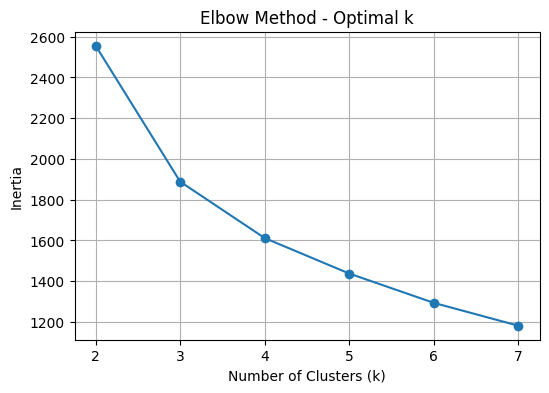

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Converter para pandas
df_cluster = df_user_features.to_pandas().dropna()

X = df_cluster[['avg_rating', 'stddev_rating', 'n_ratings', 'n_genres_rated']]

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular inércia (distância interna dos clusters)
inertias = []
K = range(2, 8)  # testar 2 a 7 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(6,4))
plt.plot(K, inertias, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid(True)
plt.show()

7.3 - Clustering users


In [70]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Resumo dos clusters
cluster_summary = df_cluster.groupby('cluster').agg({
    'avg_rating': 'mean',
    'stddev_rating': 'mean',
    'n_ratings': 'mean',
    'n_genres_rated': 'mean'
}).round(2)

print("CLUSTER SUMMARY:")
print(cluster_summary)

CLUSTER SUMMARY:
         avg_rating  stddev_rating  n_ratings  n_genres_rated
cluster                                                      
0              3.28           1.21      53.20            8.32
1              3.54           1.01     223.95           14.22
2              3.87           0.88      52.66            8.56


#### 8. Are there consistent user biases in the rating scale (e.g., avoiding extremes, clustering around 3–4)? 

In [71]:
#avg_rating: shows if user tends to give high/low ratings
#rating_std: low std = user avoids extremes
#num_ratings: useful to filter out very sparse users

df_user_stats = conn.execute("""
    SELECT 
        userId,
        AVG(rating) AS avg_rating,
        STDDEV_POP(rating) AS rating_std,
        COUNT(*) AS num_ratings
    FROM ratings_table
    GROUP BY userId
    ORDER BY userId
""").pl()

print(df_user_stats)

shape: (943, 4)
┌────────┬────────────┬────────────┬─────────────┐
│ userId ┆ avg_rating ┆ rating_std ┆ num_ratings │
│ ---    ┆ ---        ┆ ---        ┆ ---         │
│ i64    ┆ f64        ┆ f64        ┆ i64         │
╞════════╪════════════╪════════════╪═════════════╡
│ 1      ┆ 3.610294   ┆ 1.26126    ┆ 272         │
│ 2      ┆ 3.709677   ┆ 1.022128   ┆ 62          │
│ 3      ┆ 2.796296   ┆ 1.207686   ┆ 54          │
│ 4      ┆ 4.333333   ┆ 0.897527   ┆ 24          │
│ 5      ┆ 2.874286   ┆ 1.359063   ┆ 175         │
│ …      ┆ …          ┆ …          ┆ …           │
│ 939    ┆ 4.265306   ┆ 0.964164   ┆ 49          │
│ 940    ┆ 3.457944   ┆ 1.007267   ┆ 107         │
│ 941    ┆ 4.045455   ┆ 0.877873   ┆ 22          │
│ 942    ┆ 4.265823   ┆ 0.758227   ┆ 79          │
│ 943    ┆ 3.410714   ┆ 1.255134   ┆ 168         │
└────────┴────────────┴────────────┴─────────────┘


In [72]:
df_user_clustering = conn.execute("""
    SELECT 
        userId,
        SUM(CASE WHEN rating IN (3,4) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS frac_3_4
    FROM ratings_table
    GROUP BY userId
    ORDER BY userId
""").pl()

print(df_user_clustering)

shape: (943, 2)
┌────────┬──────────┐
│ userId ┆ frac_3_4 │
│ ---    ┆ ---      │
│ i64    ┆ f64      │
╞════════╪══════════╡
│ 1      ┆ 0.507353 │
│ 2      ┆ 0.709677 │
│ 3      ┆ 0.444444 │
│ 4      ┆ 0.375    │
│ 5      ┆ 0.485714 │
│ …      ┆ …        │
│ 939    ┆ 0.367347 │
│ 940    ┆ 0.71028  │
│ 941    ┆ 0.590909 │
│ 942    ┆ 0.544304 │
│ 943    ┆ 0.535714 │
└────────┴──────────┘


In [73]:
df_user_extremes = conn.execute("""
    SELECT 
        userId,
        SUM(CASE WHEN rating IN (1,5) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS frac_extremes
    FROM ratings_table
    GROUP BY userId
""").pl()

print(df_user_extremes)

shape: (943, 2)
┌────────┬───────────────┐
│ userId ┆ frac_extremes │
│ ---    ┆ ---           │
│ i64    ┆ f64           │
╞════════╪═══════════════╡
│ 1      ┆ 0.389706      │
│ 2      ┆ 0.274194      │
│ 3      ┆ 0.259259      │
│ 4      ┆ 0.583333      │
│ 5      ┆ 0.388571      │
│ …      ┆ …             │
│ 939    ┆ 0.55102       │
│ 940    ┆ 0.17757       │
│ 941    ┆ 0.318182      │
│ 942    ┆ 0.443038      │
│ 943    ┆ 0.303571      │
└────────┴───────────────┘


In [74]:
df_user_bias = conn.execute("""
    SELECT 
        r.userId,
        AVG(r.rating) AS avg_rating,
        STDDEV_POP(r.rating) AS rating_std,
        SUM(CASE WHEN r.rating IN (3,4) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS frac_3_4,
        SUM(CASE WHEN r.rating IN (1,5) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS frac_extremes
    FROM ratings_table AS r
    GROUP BY r.userId
    ORDER BY r.userId
""").pl()

print(df_user_bias)

shape: (943, 5)
┌────────┬────────────┬────────────┬──────────┬───────────────┐
│ userId ┆ avg_rating ┆ rating_std ┆ frac_3_4 ┆ frac_extremes │
│ ---    ┆ ---        ┆ ---        ┆ ---      ┆ ---           │
│ i64    ┆ f64        ┆ f64        ┆ f64      ┆ f64           │
╞════════╪════════════╪════════════╪══════════╪═══════════════╡
│ 1      ┆ 3.610294   ┆ 1.26126    ┆ 0.507353 ┆ 0.389706      │
│ 2      ┆ 3.709677   ┆ 1.022128   ┆ 0.709677 ┆ 0.274194      │
│ 3      ┆ 2.796296   ┆ 1.207686   ┆ 0.444444 ┆ 0.259259      │
│ 4      ┆ 4.333333   ┆ 0.897527   ┆ 0.375    ┆ 0.583333      │
│ 5      ┆ 2.874286   ┆ 1.359063   ┆ 0.485714 ┆ 0.388571      │
│ …      ┆ …          ┆ …          ┆ …        ┆ …             │
│ 939    ┆ 4.265306   ┆ 0.964164   ┆ 0.367347 ┆ 0.55102       │
│ 940    ┆ 3.457944   ┆ 1.007267   ┆ 0.71028  ┆ 0.17757       │
│ 941    ┆ 4.045455   ┆ 0.877873   ┆ 0.590909 ┆ 0.318182      │
│ 942    ┆ 4.265823   ┆ 0.758227   ┆ 0.544304 ┆ 0.443038      │
│ 943    ┆ 3.410714   ┆ 

In [75]:
#avg_rating: mean rating per user (leniency/strictness)
#rating_std: how spread out a user’s ratings are (low → avoids extremes)
#frac_3_4: fraction of ratings that are 3 or 4 (middle clustering)
#frac_extremes: fraction of ratings that are 1 or 5 (extreme usage)

High frac_3_4 and low frac_extremes → user avoids extremes, clusters in the middle.

High avg_rating → lenient user

Low avg_rating → strict user

High rating_std → user uses full rating scale

In [76]:
df_user_behaviour = conn.execute("""
    SELECT 
        r.userId,
        AVG(r.rating) AS avg_rating,
        STDDEV_POP(r.rating) AS rating_std,
        SUM(CASE WHEN r.rating IN (3,4) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS frac_3_4,
        SUM(CASE WHEN r.rating IN (1,5) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS frac_extremes,
        CASE
            WHEN SUM(CASE WHEN r.rating IN (1,5) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) >= 0.5 THEN 'Polarizer'
            WHEN SUM(CASE WHEN r.rating IN (3,4) THEN 1 ELSE 0 END) * 1.0 / COUNT(*) >= 0.6 THEN 'Centralizer'
            WHEN AVG(r.rating) >= 4 THEN 'Lenient'
            WHEN AVG(r.rating) <= 2.5 THEN 'Critical'
            ELSE 'Mixed'
        END AS type
    FROM ratings_table AS r
    GROUP BY r.userId
    ORDER BY r.userId
""").pl()

print(df_user_behaviour)

shape: (943, 6)
┌────────┬────────────┬────────────┬──────────┬───────────────┬─────────────┐
│ userId ┆ avg_rating ┆ rating_std ┆ frac_3_4 ┆ frac_extremes ┆ type        │
│ ---    ┆ ---        ┆ ---        ┆ ---      ┆ ---           ┆ ---         │
│ i64    ┆ f64        ┆ f64        ┆ f64      ┆ f64           ┆ str         │
╞════════╪════════════╪════════════╪══════════╪═══════════════╪═════════════╡
│ 1      ┆ 3.610294   ┆ 1.26126    ┆ 0.507353 ┆ 0.389706      ┆ Mixed       │
│ 2      ┆ 3.709677   ┆ 1.022128   ┆ 0.709677 ┆ 0.274194      ┆ Centralizer │
│ 3      ┆ 2.796296   ┆ 1.207686   ┆ 0.444444 ┆ 0.259259      ┆ Mixed       │
│ 4      ┆ 4.333333   ┆ 0.897527   ┆ 0.375    ┆ 0.583333      ┆ Polarizer   │
│ 5      ┆ 2.874286   ┆ 1.359063   ┆ 0.485714 ┆ 0.388571      ┆ Mixed       │
│ …      ┆ …          ┆ …          ┆ …        ┆ …             ┆ …           │
│ 939    ┆ 4.265306   ┆ 0.964164   ┆ 0.367347 ┆ 0.55102       ┆ Polarizer   │
│ 940    ┆ 3.457944   ┆ 1.007267   ┆ 0.71028  ┆ 

### Temporal & Evolution Analysis 

#### 11. How have ratings evolved over time - do older classics get rated differently from modern movies? 

#### 12. What is the relationship between a movie’s release year and its popularity (number of ratings)? 

#### 13. Are there temporal patterns in rating behavior (e.g., weekends, seasons, or time of day)? 

#### 14. Which decades produced the most highly rated movies on average, and why might that be? 

In [78]:
df = conn.execute("""
WITH movie_decades AS (
  SELECT 
    movieId,
    title,
    -- Extract year from release_date (assuming format like '01-Jan-1995')
    CAST(SUBSTR(release_date, -4) AS INTEGER) AS release_year,
    CASE 
      WHEN CAST(SUBSTR(release_date, -4) AS INTEGER) < 1950 THEN '1940s'
      WHEN CAST(SUBSTR(release_date, -4) AS INTEGER) < 1960 THEN '1950s'
      WHEN CAST(SUBSTR(release_date, -4) AS INTEGER) < 1970 THEN '1960s'
      WHEN CAST(SUBSTR(release_date, -4) AS INTEGER) < 1980 THEN '1970s'
      WHEN CAST(SUBSTR(release_date, -4) AS INTEGER) < 1990 THEN '1980s'
      WHEN CAST(SUBSTR(release_date, -4) AS INTEGER) < 2000 THEN '1990s'
      ELSE '2000s+'
    END AS decade
  FROM movies_table
  WHERE release_date IS NOT NULL AND SUBSTR(release_date, -4) ~ '^[0-9]{4}$'
),
movie_ratings AS (
  SELECT 
    movieId,
    AVG(rating) AS avg_rating,
    COUNT(*) AS num_ratings
  FROM ratings_table
  GROUP BY movieId
)
SELECT 
  md.decade,
  ROUND(AVG(mr.avg_rating), 2) AS avg_decade_rating,
  COUNT(DISTINCT md.movieId) AS num_movies,
  SUM(mr.num_ratings) AS total_ratings
FROM movie_decades md
JOIN movie_ratings mr ON md.movieId = mr.movieId
GROUP BY md.decade
ORDER BY avg_decade_rating DESC
""").pl()
print(df)

shape: (6, 4)
┌────────┬───────────────────┬────────────┬───────────────┐
│ decade ┆ avg_decade_rating ┆ num_movies ┆ total_ratings │
│ ---    ┆ ---               ┆ ---        ┆ ---           │
│ str    ┆ f64               ┆ i64        ┆ decimal[38,0] │
╞════════╪═══════════════════╪════════════╪═══════════════╡
│ 1960s  ┆ 3.61              ┆ 43         ┆ 3875          │
│ 1950s  ┆ 3.6               ┆ 54         ┆ 3506          │
│ 1940s  ┆ 3.56              ┆ 76         ┆ 3801          │
│ 1980s  ┆ 3.32              ┆ 107        ┆ 12122         │
│ 1970s  ┆ 3.31              ┆ 53         ┆ 6242          │
│ 1990s  ┆ 2.98              ┆ 1348       ┆ 70445         │
└────────┴───────────────────┴────────────┴───────────────┘


### Extended Insights 

#### 15. Which directors or franchises consistently achieve higher average ratings or show less variability? Using the links.csv file, join to external data (IMDB/TMDB) to analyze: Average rating per director or franchise; Whether certain directors have more consistent ratings.

In [79]:
df = conn.execute("""
WITH title_patterns AS (
  SELECT 
    movieId,
    title,
    SPLIT_PART(REGEXP_REPLACE(title, '[^a-zA-Z0-9\\s]', ''), ' ', 1) AS first_word,
    CASE 
      WHEN SPLIT_PART(REGEXP_REPLACE(title, '[^a-zA-Z0-9\\s]', ''), ' ', 2) != ''
      THEN SPLIT_PART(REGEXP_REPLACE(title, '[^a-zA-Z0-9\\s]', ''), ' ', 1) || ' ' || 
           SPLIT_PART(REGEXP_REPLACE(title, '[^a-zA-Z0-9\\s]', ''), ' ', 2)
      ELSE SPLIT_PART(REGEXP_REPLACE(title, '[^a-zA-Z0-9\\s]', ''), ' ', 1)
    END AS first_two_words
  FROM movies_table
),
pattern_frequency AS (
  SELECT 
    first_two_words AS franchise_pattern,
    COUNT(DISTINCT movieId) AS movie_count
  FROM title_patterns
  WHERE first_two_words NOT IN ('The', 'A', 'An', 'Les', 'La', 'Le')
  GROUP BY first_two_words
  HAVING COUNT(DISTINCT movieId) >= 3
),
franchise_movies AS (
  SELECT 
    tp.movieId,
    tp.title,
    pf.franchise_pattern AS franchise,
    pf.movie_count AS franchise_size
  FROM title_patterns tp
  JOIN pattern_frequency pf ON tp.first_two_words = pf.franchise_pattern
),
movie_ratings AS (
  SELECT 
    movieId,
    AVG(rating) AS avg_rating,
    COUNT(*) AS num_ratings,
    STDDEV(rating) AS rating_stddev
  FROM ratings_table
  GROUP BY movieId
),
franchise_stats AS (
  SELECT 
    fm.franchise,
    fm.franchise_size AS num_movies,
    STRING_AGG(fm.title, ' | ') AS movie_titles,
    ROUND(AVG(mr.avg_rating), 3) AS avg_rating,
    ROUND(AVG(mr.rating_stddev), 3) AS avg_stddev,
    SUM(mr.num_ratings) AS total_ratings,
    ROUND(MIN(mr.avg_rating), 2) AS min_rating,
    ROUND(MAX(mr.avg_rating), 2) AS max_rating,
    ROUND(MAX(mr.avg_rating) - MIN(mr.avg_rating), 2) AS rating_range,
    ROUND(AVG(mr.avg_rating) / NULLIF(AVG(mr.rating_stddev), 0), 2) AS consistency_ratio
  FROM franchise_movies fm
  JOIN movie_ratings mr ON fm.movieId = mr.movieId
  GROUP BY fm.franchise, fm.franchise_size
  HAVING COUNT(DISTINCT fm.movieId) >= 3
)
SELECT * FROM franchise_stats
ORDER BY avg_rating DESC, avg_stddev ASC
""").df() 

In [80]:
# Display compacto
print("🎬 TOP FRANCHISES - VISÃO GERAL")
print("=" * 120)
print(f"{'#':<3} {'Franchise':<20} {'Rating':<8} {'Movies':<8} {'Range':<12} {'StdDev':<8} {'Total Ratings':<15}")
print("-" * 120)

for idx, row in df.iterrows():
    print(f"{idx+1:<3} {row['franchise']:<20} {row['avg_rating']:<8.3f} {row['num_movies']:<8} "
          f"{row['min_rating']:.1f}-{row['max_rating']:.1f}{'':<6} {row['avg_stddev']:<8.3f} {row['total_ratings']:<15,}")

# Mostrar detalhes de cada franchise quando usuário pedir
print(f"\n{'═' * 120}")
print("📋 DETALHES COMPLETOS DOS FILMES:")
print(f"{'═' * 120}")

for idx, row in df.iterrows():
    print(f"\n🎯 #{idx+1} {row['franchise']} (⭐ {row['avg_rating']:.3f}):")
    titles = row['movie_titles'].split(' | ')
    for title in titles:
        print(f"   • {title}")

🎬 TOP FRANCHISES - VISÃO GERAL
#   Franchise            Rating   Movies   Range        StdDev   Total Ratings  
------------------------------------------------------------------------------------------------------------------------
1   Three Colors         3.980    3        3.9-4.1       1.017    206.0          
2   Wings of             3.893    3        3.7-4.0       1.010    133.0          
3   Return of            3.778    3        3.5-4.0       0.934    643.0          
4   Once Upon            3.518    3        3.3-3.9       0.976    116.0          
5   Die Hard             3.504    3        3.3-3.9       0.987    560.0          
6   Adventures of        3.479    3        3.0-3.8       1.007    217.0          
7   Star Trek            3.260    8        2.4-3.8       1.015    1,436.0        
8   In the               3.127    8        2.0-3.9       1.134    410.0          
9   City of              3.097    3        2.5-3.8       1.263    110.0          
10  Man of               2.88

In [81]:
# Filter to keep only the actual franchises
real_franchises = ['Three Colors', 'Die Hard', 'Star Trek', 'Free Willy']
df_real = df[df['franchise'].isin(real_franchises)]

# Create a clean display table with selected columns
display_table = df_real[['franchise', 'num_movies', 'avg_rating', 'avg_stddev', 'rating_range', 'min_rating', 'max_rating', 'consistency_ratio']].copy()

# Format the numeric columns for better display
display_table['avg_rating'] = display_table['avg_rating'].round(3)
display_table['avg_stddev'] = display_table['avg_stddev'].round(3)
display_table['rating_range'] = display_table['rating_range'].round(2)
display_table['min_rating'] = display_table['min_rating'].round(2)
display_table['max_rating'] = display_table['max_rating'].round(2)
display_table['consistency_ratio'] = display_table['consistency_ratio'].round(2)

# Rename columns for better readability
display_table = display_table.rename(columns={
    'franchise': 'Franchise',
    'num_movies': 'Number of Movies',
    'avg_rating': 'Average Rating',
    'avg_stddev': 'Rating Std Dev',
    'rating_range': 'Rating Range',
    'min_rating': 'Min Rating',
    'max_rating': 'Max Rating',
    'consistency_ratio': 'Consistency Ratio'
})

print("REAL FRANCHISES - SUMMARY TABLE")
print("=" * 80)
print(display_table.to_string(index=False))
print("\n")

# Also show the individual movies in each franchise
print("FRANCHISE MOVIE DETAILS")
print("=" * 80)
for idx, row in df_real.iterrows():
    print(f"\n{row['franchise']} ({row['num_movies']} movies):")
    movies = row['movie_titles'].split(' | ')
    for movie in movies:
        print(f"  • {movie}")
    print(f"  Average Rating: {row['avg_rating']} | Consistency: {row['avg_stddev']} | Range: {row['rating_range']}")

REAL FRANCHISES - SUMMARY TABLE
   Franchise  Number of Movies  Average Rating  Rating Std Dev  Rating Range  Min Rating  Max Rating  Consistency Ratio
Three Colors                 3           3.980           1.017          0.20        3.86        4.06               3.91
    Die Hard                 3           3.504           0.987          0.59        3.28        3.87               3.55
   Star Trek                 8           3.260           1.015          1.42        2.40        3.82               3.21
  Free Willy                 3           2.126           1.169          0.71        1.74        2.45               1.82


FRANCHISE MOVIE DETAILS

Three Colors (3 movies):
  • Three Colors: Red (1994)
  • Three Colors: Blue (1993)
  • Three Colors: White (1994)
  Average Rating: 3.98 | Consistency: 1.017 | Range: 0.2

Die Hard (3 movies):
  • Die Hard (1988)
  • Die Hard 2 (1990)
  • Die Hard: With a Vengeance (1995)
  Average Rating: 3.504 | Consistency: 0.987 | Range: 0.59

Star Tr

#### 16. Is there a relationship between a film’s popularity (number of ratings) and its average score - do popular movies tend to be better or just more visible?

In [82]:
#Compute popularity and average rating per movie


# Connect to DuckDB
# conn = duckdb.connect()

# Register Polars DataFrames as DuckDB tables
# conn.register("ratings", df_ratings)
# conn.register("movies", df_movies)

# SQL query: number of ratings and average rating per movie
sql = """
SELECT
    r.movieId,
    m.title,
    COUNT(r.rating) AS num_ratings,
    AVG(r.rating) AS avg_rating
FROM ratings_table r
JOIN movies m ON r.movieId = m.movieId
GROUP BY r.movieId, m.title
ORDER BY num_ratings DESC
"""

# Execute and get Polars DataFrame
df_movie_stats = conn.execute(sql).pl()
print(df_movie_stats)


shape: (1_682, 4)
┌─────────┬─────────────────────────────────┬─────────────┬────────────┐
│ movieId ┆ title                           ┆ num_ratings ┆ avg_rating │
│ ---     ┆ ---                             ┆ ---         ┆ ---        │
│ i64     ┆ str                             ┆ i64         ┆ f64        │
╞═════════╪═════════════════════════════════╪═════════════╪════════════╡
│ 50      ┆ Star Wars (1977)                ┆ 583         ┆ 4.358491   │
│ 258     ┆ Contact (1997)                  ┆ 509         ┆ 3.803536   │
│ 100     ┆ Fargo (1996)                    ┆ 508         ┆ 4.155512   │
│ 181     ┆ Return of the Jedi (1983)       ┆ 507         ┆ 4.00789    │
│ 294     ┆ Liar Liar (1997)                ┆ 485         ┆ 3.156701   │
│ …       ┆ …                               ┆ …           ┆ …          │
│ 1492    ┆ Window to Paris (1994)          ┆ 1           ┆ 4.0        │
│ 1575    ┆ I, Worst of All (Yo, la peor d… ┆ 1           ┆ 1.0        │
│ 1604    ┆ He Walked by Night (1

In [83]:
# Compute correlation using DuckDB
corr_sql = """
SELECT CORR(CAST(num_ratings AS DOUBLE), avg_rating) AS correlation
FROM (
    SELECT
        COUNT(r.rating) AS num_ratings,
        AVG(r.rating) AS avg_rating
    FROM ratings_table r
    GROUP BY r.movieId
) t
"""

corr_result = conn.execute(corr_sql).pl()
print("Correlation between popularity and average rating:", corr_result[0,0])

#Positive correlation → popular movies tend to have higher ratings
#Near zero → popularity and quality are independent


Correlation between popularity and average rating: 0.42965916986762254


In [84]:
# Binned popularity analysis
sql = """
WITH movie_stats AS (
    SELECT
        m.movieId,
        COUNT(r.rating) AS num_ratings,
        AVG(r.rating) AS avg_rating
    FROM ratings_table r
    JOIN movies_table m ON r.movieId = m.movieId
    GROUP BY m.movieId
),
binned AS (
    SELECT
        *,
        CASE
            WHEN num_ratings <= 50 THEN 'Very Low'
            WHEN num_ratings <= 200 THEN 'Low'
            WHEN num_ratings <= 1000 THEN 'Medium'
            ELSE 'High'
        END AS popularity_bin
    FROM movie_stats
)
SELECT
    popularity_bin,
    AVG(avg_rating) AS mean_rating_in_bin,
    COUNT(*) AS num_movies_in_bin
FROM binned
GROUP BY popularity_bin
ORDER BY mean_rating_in_bin DESC
"""

df_bin_summary = conn.execute(sql).pl()
print(df_bin_summary)
#This already answers the question: More popular movies tend to be rated higher. Low-visibility films tend to score much lower, suggesting many obscure movies are rated poorly — not just unseen.



shape: (3, 3)
┌────────────────┬────────────────────┬───────────────────┐
│ popularity_bin ┆ mean_rating_in_bin ┆ num_movies_in_bin │
│ ---            ┆ ---                ┆ ---               │
│ str            ┆ f64                ┆ i64               │
╞════════════════╪════════════════════╪═══════════════════╡
│ Medium         ┆ 3.798048           ┆ 117               │
│ Low            ┆ 3.463534           ┆ 476               │
│ Very Low       ┆ 2.829103           ┆ 1089              │
└────────────────┴────────────────────┴───────────────────┘


#### 17. How do a movie’s genre, number of ratings, and average rating interact — are some genres more likely to be popular but lower-rated, or niche but highly-rated?

In [85]:

# conn = duckdb.connect()
# conn.register("ratings", df_ratings)
# conn.register("movies", df_movies)

genre_cols = ['Action', 'Adventure', 'Animation', "Childrens", 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Unpivot genres with proper escaping
unpivot_sql = " UNION ALL ".join([
    f"""
    SELECT
        '{g.replace("'", "''")}' AS genre,
        r.rating
    FROM ratings_table r
    JOIN movies m ON r.movieId = m.movieId
    WHERE m."{g}" = 1
    """ for g in genre_cols
])

sql = f"""
SELECT
    genre,
    COUNT(rating) AS num_ratings,
    AVG(rating) AS avg_rating
FROM (
    {unpivot_sql}
) t
GROUP BY genre
ORDER BY num_ratings DESC
"""

df_genre_stats = conn.execute(sql).pl()
print(df_genre_stats)

shape: (18, 3)
┌─────────────┬─────────────┬────────────┐
│ genre       ┆ num_ratings ┆ avg_rating │
│ ---         ┆ ---         ┆ ---        │
│ str         ┆ i64         ┆ f64        │
╞═════════════╪═════════════╪════════════╡
│ Drama       ┆ 39895       ┆ 3.687379   │
│ Comedy      ┆ 29832       ┆ 3.394073   │
│ Action      ┆ 25589       ┆ 3.480245   │
│ Thriller    ┆ 21872       ┆ 3.509007   │
│ Romance     ┆ 19461       ┆ 3.621705   │
│ …           ┆ …           ┆ …          │
│ Animation   ┆ 3605        ┆ 3.576699   │
│ Western     ┆ 1854        ┆ 3.613269   │
│ Film-Noir   ┆ 1733        ┆ 3.921523   │
│ Fantasy     ┆ 1352        ┆ 3.215237   │
│ Documentary ┆ 758         ┆ 3.672823   │
└─────────────┴─────────────┴────────────┘


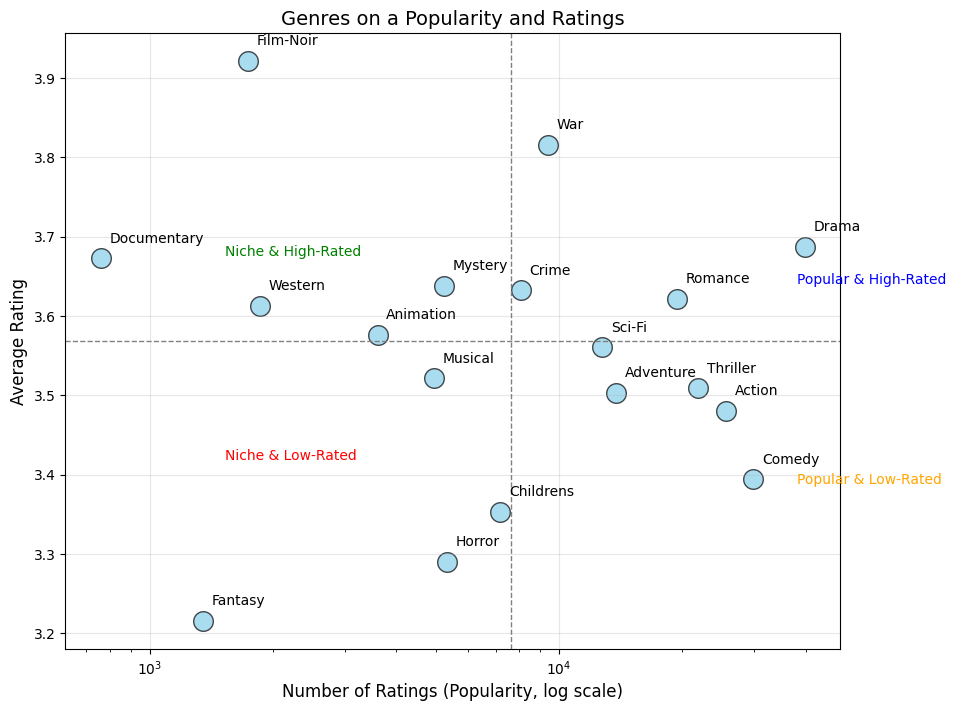

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Extract axes
x = df_genre_stats["num_ratings"].to_numpy()
y = df_genre_stats["avg_rating"].to_numpy()
labels = df_genre_stats["genre"].to_list()

# Create figure
plt.figure(figsize=(10,8))

# Scatter points
plt.scatter(x, y, s=200, alpha=0.7, color='skyblue', edgecolor='black')

# Log scale for popularity
plt.xscale('log')

# Draw vertical and horizontal lines for “center” (median values)
median_x = np.median(x)
median_y = np.median(y)
plt.axvline(median_x, color='gray', linestyle='--', lw=1)
plt.axhline(median_y, color='gray', linestyle='--', lw=1)

# Add labels
for i, label in enumerate(labels):
    plt.text(x[i]*1.05, y[i]+0.02, label, fontsize=10)

# Titles and labels
plt.xlabel("Number of Ratings (Popularity, log scale)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Genres on a Popularity and Ratings", fontsize=14)

# Add quadrant labels
plt.text(median_x/5, median_y*1.03, 'Niche & High-Rated', fontsize=10, color='green')
plt.text(median_x*5, median_y*1.02, 'Popular & High-Rated', fontsize=10, color='blue')
plt.text(median_x/5, median_y-0.15, 'Niche & Low-Rated', fontsize=10, color='red')
plt.text(median_x*5, median_y-0.18, 'Popular & Low-Rated', fontsize=10, color='orange')

plt.grid(True, alpha=0.3)
plt.show()

